In [192]:
# CMIP 6 
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xrvn1
from netCDF4 import Dataset
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import sem
AOD=[]
import xarray as xr
from my_functions import *
os.chdir("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/")

ODMS_file = sorted(glob.glob('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/Ocean_DMS/*.nc'))
# O3_file = sorted(glob.glob('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Ozone_loss//*.nc'))

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
vn2=xr.open_dataset(ODMS_file[3])
olat=vn2.latitude
olon=vn2.longitude

vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/DMS/dms_AERmon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-189912.nc')
lats=vn1.lat
lons=vn1.lon
time=vn1.time
# Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
lat_bnds = [-90, -60]
inpath_modis=sorted(glob.glob('/nesi/nobackup/niwa02757/ybh10/Observational_Data/MODIS/AOD/*.nc'))
latty_o=xr.open_dataset(inpath_modis[0])
lat_o=latty_o['lat']
lon_o=latty_o['lon']
vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/Ocean_DMS/dmsos_Omon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-194912.nc')
Olat=vn1.latitude

DMS_ppt=((29/62.13)*1e12)
ODMS_ppm=1e6
ODMS_ppt=(((18/62.13)*1e12))

SO2_ppt=((29/64.06)*1e12)
O3_ppm=((29/48)*1e6)
season=['DJF','MAM','JJA','SON']
 
lat=lats[19:32] # 50 - 65s IN UKESM1:
files=[]
files_global=[]
AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; RF_CS_ozone=[]; SO2_ozone=[];Surface_RF_CS_ozone=[]; Wind_ozone=[];RFSW_CS_ozone=[]
variables=[AOD_ozone,DMS_ozone,Oceanic_DMS_ozone,Ozone_Column_ozone,RF_CS_ozone,SO2_ozone,Surface_RF_CS_ozone,Wind_ozone]

DJF_var=[]; MAM_var=[]; JJA_var=[]; SON_var=[]
season_var=[DJF_var,MAM_var,JJA_var,SON_var]
DJF_global_var=[]; MAM_global_var=[]; JJA_global_var=[]; SON_global_var=[]
season_global_var=[DJF_global_var,MAM_global_var,JJA_global_var,SON_global_var]
last=[]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8
names=['AOD_','DMS_','Oceanic_DMS','Ozone','RF_CS','SO2','Wind','RFSW','Surface_RFSW']
for s,glvar in zip(season,season_global_var):
    Globa=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/{}/Ensamble/*".format(s)))
    files_global.append(Globa)
    for g in (Globa):
        if g.find (Globa[4]) !=-1: #RFSW_CS_Global
            second_last=(np.load(g))
        else:
            if g.find (Globa[7]) !=-1: # Surface_RFSW
                last=(np.load(g))
            else:
                glo_filey=np.load(g)
                #print(g)
                glvar.append(glo_filey)
                if g.find ('/Ensamble/Wind_Global.npy') !=-1:
                  #  print('end of season')
                    glvar.append(second_last)
                    glvar.append(last)
                    
                
#season_global_var.append(last)

# for s,var in zip(season,season_var):
#     Regi=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/{}/Ensamble/*".format(s)))
#     files.append(Regi)
#     for f in (Regi):
#         reg_filey=np.load(f)
#         var.append(reg_filey)
# #         glo_filey=np.load(g)
# #         glvar.append(glo_filey)
     

def standard(data):
    serror=sem(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

def CMIP6(regional,globe,dms_PPT,array,global_array):  # This function will give me all seasons when specified the first and last!
    season=np.arange(0,len(regional),12)
    if (First)==11 !=-1: # Only activated when DJF seasonality is being used.
        for seas in (season):
            p=((globe[First+seas]))
            j=((globe[first1+seas]))
            i=((globe[Last+seas]))
            globally=np.nanmean((p,j,i))
            global_array.append(globally)
    else: # Activated when MAM, JA, SON is being created.
        for seas in (season):
                regionally=(np.nanmean(regional[First+seas:Last+seas],axis=0)*dms_PPT)
                globally=(np.nanmean(globe[First+seas:Last+seas],axis=0)*dms_PPT)
                array.append(regionally)
                global_array.append(globally)
    return array,global_array

In [11]:
DJF_global_wind=[];MAM_global_wind=[]; JJA_global_wind=[]; SON_global_wind=[]
seasonal_wind=[DJF_global_wind,MAM_global_wind,JJA_global_wind,SON_global_wind]
file_wind=[]
## FOR WIND SEASONAL LAG
for s,glwind in zip(season,seasonal_wind):
    Globa=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/{}/Wind/*.npy*".format(s)))
    file_wind.append(Globa)
    for g in (Globa):
#         reg_filey=np.load(f)
#         var.append(reg_filey)
        glo_filey=np.load(g)
        glwind.append(glo_filey)
seasonal_wind=np.squeeze(seasonal_wind,axis=1)   

year2=np.arange(1850,2015,1)

def five_year_mean(variable,lat,latx,laty): 
    ## Variable has shape: (13, 165, 144, 192)
    wind_mean=np.zeros((13,33,np.shape(variable)[2],192))
    five=np.arange(0,165,5)
    value_mean=np.zeros((13,165,np.shape(variable)[2],192))
    for n,i in zip(five,range(0,33)):
        wind_mean[:,i,:,:]=np.nanmean(variable[:,n:n+5,:,:],axis=(1))
    if i == 32 !=-1:
        wind_mean_sh=wind_mean[:,:,latx:laty,:]
        wind_5_mean=np.nanmean(areaweight(wind_mean_sh,lat[latx:laty]),axis=(0))

        wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
        wind_mean_ssh=np.zeros((13,165,laty-latx,192))
        for i,l in zip(five,range(0,34)):
            wind_mean_5[i+4]=wind_5_mean[l]
            wind_mean_ssh[:,i+4,:,:]=wind_mean_sh[:,l,:,:]

        if l == 32 !=-1:    
            y = np.where(np.isnan(wind_mean_5), None, wind_mean_5)
            series1 = y.astype(np.double)
            s1mask = np.isfinite(series1)     
            y = np.where(np.isnan(wind_mean_ssh), None, wind_mean_ssh)
            series1 = y.astype(np.double)
            errmask = np.isfinite(series1)    
            return wind_mean_5,s1mask,wind_mean_ssh,errmask

    
# five=np.arange(0,165,5)
# wind_mean=np.zeros((4,13,165,144,192))
# for n,i in zip(five,range(0,165)):
#     wind_mean[:,:,i,:,:]=np.nanmean(seasonal_wind[:,:,n:n+5,:,:],axis=(2))
   

# wind_mean_sh=wind_mean[:,:,:,19:40]
# wind_5_mean=(np.nanmean(wind_mean_sh[0],axis=(0,2,3))) 

# wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
# for i,l in zip(five,range(0,33)):
#     wind_mean_5[i+5]=wind_5_mean[l]
    

In [4]:
# DMS_SH_mean=np.mean(DMS,axis=(1,2))
# SO2_SH_mean=np.mean(SO2,axis=(1,2))*SO2_ppt
# O3_SH_mean=np.mean(O3,axis=(1,2))*O3_ppm
# O3_Column_SH_mean=np.mean(Ozone_column,axis=(1,2))*O3_ppm
# AOD_SH_mean=np.mean(AOD,axis=(1,2))

# DMS_mean=np.mean(DMS_Global,axis=(1,2))
# SO2_mean=np.mean(SO2_Global,axis=(1,2))*SO2_ppt
# O3_mean=np.mean(O3_Global,axis=(2,3))*O3_ppm
# O3_Column_mean=np.mean(Ozone_column_Global,axis=(1,2))*O3_ppm
# AOD_mean=np.mean(AOD_Global,axis=(1,2))
# Ocean_DMS_mean=np.mean(Ocean_DMS_Global,axis=(1,2))

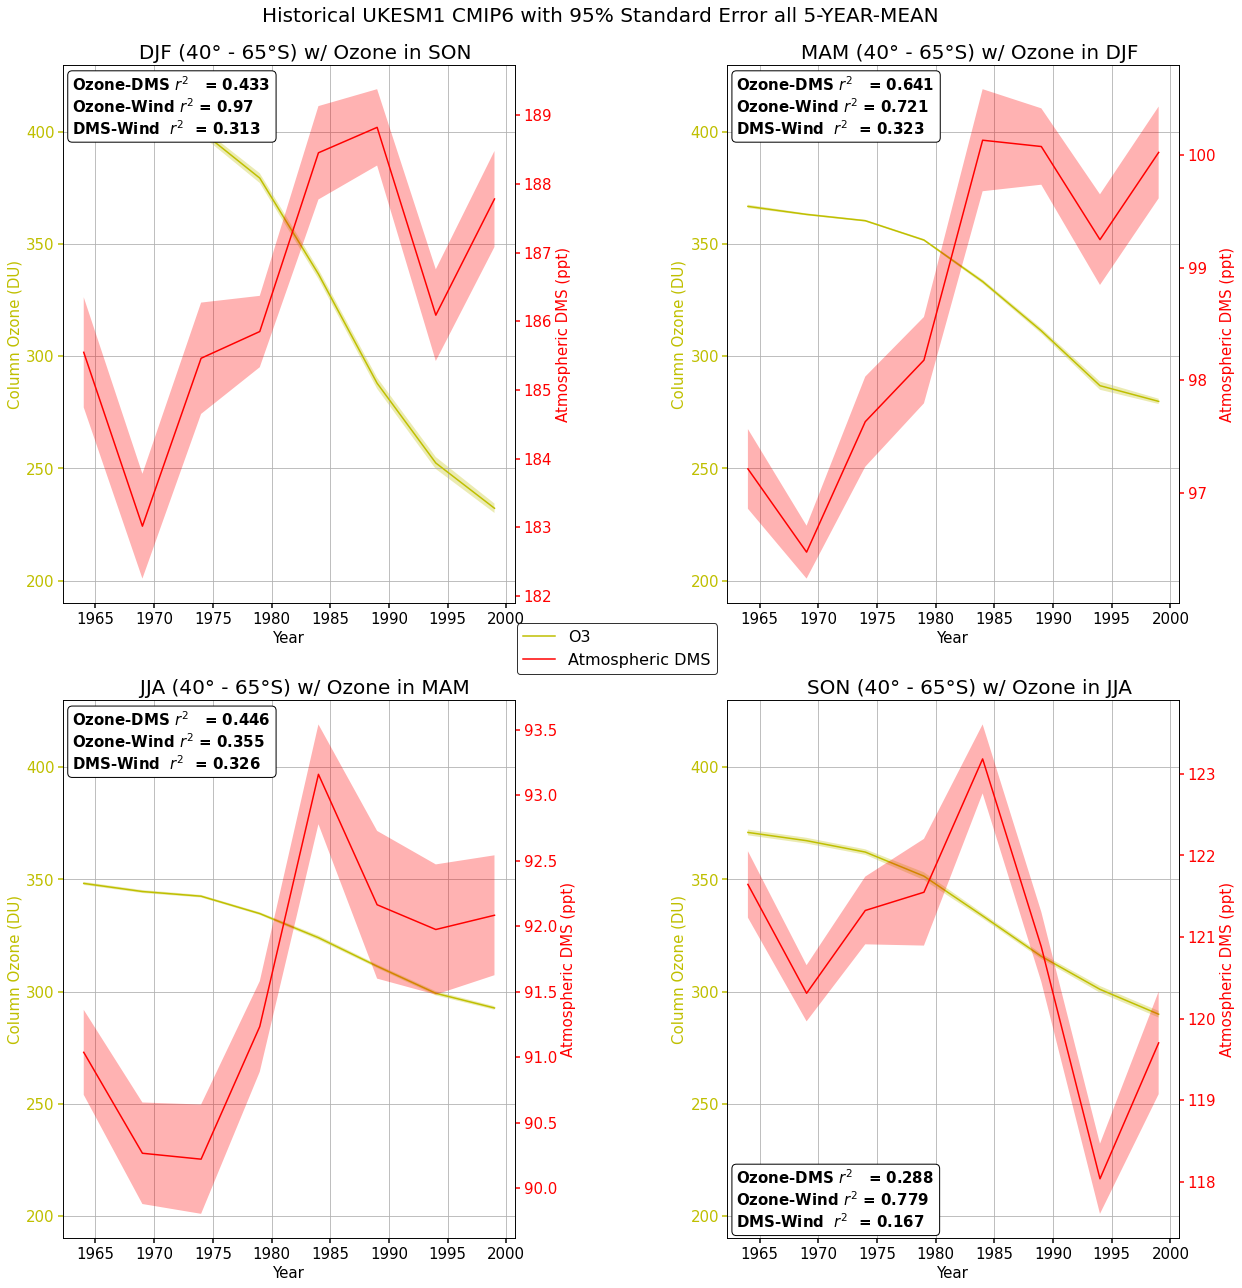

In [7]:
                                 ### SO2, DMS, OZONE VARIABLE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; RF_CS__ozone=[]; SO2_ozone=[]; Wind_ozone=[]

DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2
ozone_season_type=['SON','DJF','MAM','JJA']
#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]

#ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8



    
    
seasonal_ozone=(season_global_var[1][oz],season_global_var[2][oz],season_global_var[3][oz],season_global_var[0][oz])
seasonal_ozone_reg=(season_var[3][oz],season_var[0][oz],season_var[1][oz],season_var[2][oz])

for axe,month_variable,oc_dms,global_var,seas,ozone_seas,ozone_type in zip(axes,season_var,Var_DMS,season_global_var,season_type,ozone_season_type,seasonal_ozone_reg):
    axe.grid()
    year1=np.arange(1960,2000,1)
    par1 = axe.twinx()
    DMS=five_year_mean(global_var[dm],lats,19,40)[0][110:150]*DMS_ppt
    DMS_error=areaweight(five_year_mean(global_var[dm],lats,19,40)[2][:,110:150],lats[19:40])*DMS_ppt
    DMS_Error=standard(DMS_error)
    y = np.where((DMS_Error[0]==0), None, DMS_Error[0])
    series1 = y.astype(np.double)
    dmsmask = np.isfinite(series1) 
    
    windy_mask=five_year_mean(global_var[w],lats,19,40)[1][110:150]
    windy_meaned=five_year_mean(global_var[w],lats,19,40)[0][110:150]
#     #SO2=np.nanmean(global_var[dm][:,110:150,19:40],axis=(0,2,3)) #*SO2_ppt
#     SO2_error=areaweight(five_year_mean(global_var[w],lats,19,40)[2][:,110:150],lats[19:40])
#        #global_var[w][:,110:150,19:40],axis=(2,3)) #*SO2_ppt
#     SO2_Error=standard(SO2_error)

#    ozone_mask=(five_year_mean(ozone_type,lats,0,24)[1][110:150])
    Ozone=(five_year_mean(ozone_type,lats,0,24)[0][110:150])
    Ozone_error=areaweight(five_year_mean(ozone_type,lats,0,24)[2][:,110:150],lats[0:24])
    Ozone_Error=standard(Ozone_error)


#     wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
#     for i,l in zip(five,range(0,33)):
#         wind_mean_5[i+5]=wind_5_mean[l]

#     p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ") Westerly Wind
#     par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

#     p2,=par1.plot(year1[errmask],windy_meaned[errmask],'r-',label = "Atmospheric DMS")
#     par1.fill_between(year1[errmask], SO2_Error[0][errmask], SO2_Error[1][errmask],facecolor='r',alpha=0.3,)

    p2,=par1.plot(year1[dmsmask],DMS[dmsmask],'r-',label = "Atmospheric DMS")
    par1.fill_between(year1[dmsmask], DMS_Error[0][dmsmask], DMS_Error[1][dmsmask],facecolor='r',alpha=0.3,)
    
    p1,=axe.plot(year1[dmsmask],Ozone[dmsmask],'y-',label = "O3")
    axe.fill_between(year1[dmsmask], Ozone_Error[0][dmsmask], Ozone_Error[1][dmsmask],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
  #  par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15) Column Ozone (DU)
 #   par1.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
 #   par1.set_ylabel("Column Ozone (DU)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    par1.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    axe.set_ylabel("Column Ozone (DU)",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
   # par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
  #  par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
#    axe.set_ylim(190,430)
    axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2]
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
        plt.text(0.02,0.87,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
# #         plt.text(1850,420,'Ozone-DMS $r^2$   = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-SO2{} $r^2$   = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')

#     plt.text(1900,265,'Ozone-DMS $r^2$ = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,250,'Ozone-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,235,'DMS-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    plt.title("     {} (40\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) w/ Ozone in {}".format(seas,ozone_seas),fontsize=20)

 #   plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error all 5-YEAR-MEAN ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.023),edgecolor='black')
#plt.tight_layout()
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_SO2_DMS_Ozone.png",dpi=600,bbox_inches = 'tight')
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/Lagged/UKESM1_40_65S_5_YRMEANED_DMS_LAGGED_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_40_65S_DMS_Wind.png",dpi=600,bbox_inches = 'tight')


In [ ]:
                                 ### SO2, DMS, OZONE VARIABLE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; RF_CS__ozone=[]; SO2_ozone=[]; Wind_ozone=[]

DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2
ozone_season_type=['SON','DJF','MAM','JJA']
#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6


    
    
seasonal_ozone=(season_global_var[1][oz],season_global_var[2][oz],season_global_var[3][oz],season_global_var[0][oz])
seasonal_ozone_reg=(season_var[3][oz],season_var[0][oz],season_var[1][oz],season_var[2][oz])

for axe,month_variable,oc_dms,global_var,seas,ozone_seas,ozone_type in zip(axes,season_var,Var_DMS,season_global_var,season_type,ozone_season_type,seasonal_ozone_reg):
    axe.grid()
    year1=np.arange(1960,2000,1)
    par1 = axe.twinx()
  #  par2 = axe.twinx()
   # par2.spines["right"].set_position(("axes", 1.2))
   # par2.spines["right"].set_visible(True)
        
   # oceanic_dms=oc_dms
    #month_variable=Var
#    DMS=np.nanmean(month_variable[1][:,:,19:32]*DMS_ppt,axis=(0,2,3))
    DMS=five_year_mean(global_var[w],lats,19,40)[0][110:150]*DMS_ppt
    DMS_error=areaweight(five_year_mean(global_var[dm],lats,19,40)[2][:,110:150],lats[19:40])*DMS_ppt
    DMS_Error=standard(DMS_error)

    windy_mask=five_year_mean(global_var[dm],lats,19,40)[1][110:150]
    windy_meaned=five_year_mean(global_var[dm],lats,19,40)[0][110:150]
    #SO2=np.nanmean(global_var[dm][:,110:150,19:40],axis=(0,2,3)) #*SO2_ppt
    SO2_error=areaweight(five_year_mean(global_var[dm],lats,19,40)[2][:,110:150],lats[19:40])
       #global_var[w][:,110:150,19:40],axis=(2,3)) #*SO2_ppt
    SO2_Error=standard(SO2_error)
    
    y = np.where((SO2_Error[0]==0), None, SO2_Error[0])
    series1 = y.astype(np.double)
    errmask = np.isfinite(series1) 

    
    ozone_mask=(five_year_mean(ozone_type,lats,0,24)[1][110:150])
    Ozone=(five_year_mean(ozone_type,lats,0,24)[0][110:150])
    Ozone_error=areaweight(five_year_mean(ozone_type,lats,0,24)[2][:,110:150],lats[0:24])
    Ozone_Error=standard(Ozone_error)
#     y = np.where((SO2_Error[0]==0), None, SO2_Error[0])
#     series1 = y.astype(np.double)
#     errmask = np.isfinite(series1)
    #masky=five_year_mean(ozone_type,0,24)[3][:,110:150]    
#     Ozone=np.nanmean(ozone_type[:,110:150],axis=(0,2,3))
#     Ozone_error=np.nanmean(ozone_type[:,110:150],axis=(2,3))
#     Ozone_Error=standard(Ozone_error)
    
#     wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
#     for i,l in zip(five,range(0,33)):
#         wind_mean_5[i+5]=wind_5_mean[l]

#     p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ") Westerly Wind
#     par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1[errmask],windy_meaned[errmask],'r-',label = "Atmospheric DMS")
    par1.fill_between(year1[errmask], SO2_Error[0][errmask], SO2_Error[1][errmask],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1[errmask],DMS[errmask],'y-',label = "O3")
    axe.fill_between(year1[errmask], DMS_Error[0][errmask], DMS_Error[1][errmask],facecolor='y',alpha=0.3,)
    
#     p1,=axe.plot(year1,Ozone,'y-',label = "O3")
#     axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
  #  par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15) Column Ozone (DU)
 #   par1.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
    par1.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
   # par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
  #  par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
#    axe.set_ylim(190,430)
    axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2]
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
        plt.text(0.02,0.87,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
# #         plt.text(1850,420,'Ozone-DMS $r^2$   = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-SO2{} $r^2$   = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')

#     plt.text(1900,265,'Ozone-DMS $r^2$ = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,250,'Ozone-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,235,'DMS-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    plt.title("     {} (40\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) w/ Ozone in {}".format(seas,ozone_seas),fontsize=20)

 #   plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error all 5-YEAR-MEAN ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.023),edgecolor='black')
#plt.tight_layout()
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_SO2_DMS_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/Lagged/UKESM1_40_65S_5_YRMEANED_DMS_LAGGED_Ozone.png",dpi=600,bbox_inches = 'tight')
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_40_65S_DMS_Wind.png",dpi=600,bbox_inches = 'tight')


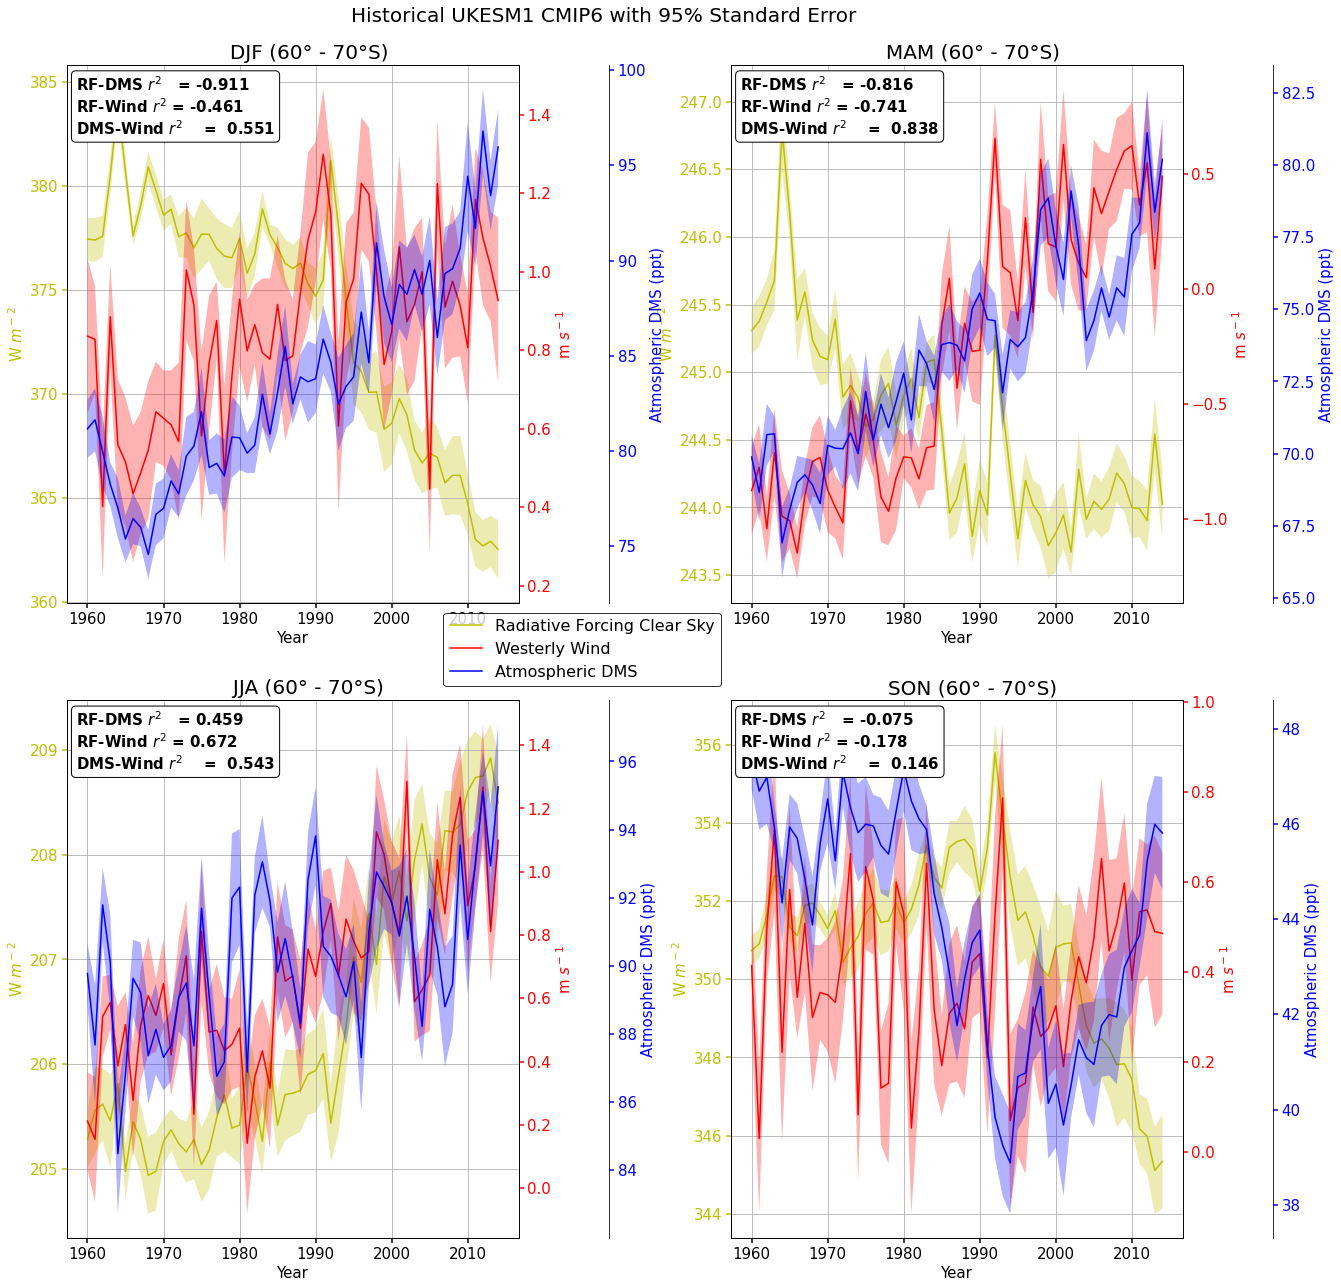

In [84]:
                                    ### OCEANIC DMS, DMS, OZONE VARIABLE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas,wind_seas in zip(axes,season_var,Var_DMS,season_global_var,season_type,seasonal_lagged_wind):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
    par2 = axe.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var                   # 19:40 = 40 - 65S | 19:32 = 50 - 65S
    DMS=np.nanmean(global_var[dm][:,110:165,15:24]*DMS_ppt,axis=(0,2,3))
    DMS_error=np.nanmean(global_var[dm][:,110:165,15:24]*DMS_ppt,axis=(2,3))
    DMS_Error=standard(DMS_error)

#    Oceanic_DMS=np.nanmean(oc_dms* 1000000,axis=(0,2,3))
                                                   #84:126 = 40 - 65S
    Oceanic_DMS=np.nanmean(wind_seas[:,110:165,15:24],axis=(0,2,3))
    Oceanic_DMS_error=np.nanmean(wind_seas[:,110:165,15:24],axis=(2,3))
#     Oceanic_DMS=np.nanmean(global_var[w][:,110:165,70:94]* 1000000,axis=(0,2,3))
#     Oceanic_DMS_error=np.nanmean(global_var[w][:,110:165,70:94]* 1000000,axis=(2,3))
    
    Oceanic_DMS_Error=standard(Oceanic_DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(global_var[r][:,110:165,15:24],axis=(0,2,3))
    Ozone_error=np.nanmean(global_var[r][:,110:165,15:24],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ")
    par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "Westerly Wind")
    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "Radiative Forcing Clear Sky")
    #p1,=axe.plot(year1,Ozone,'y-',label = "Westerly Wind")

    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
    par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    par1.set_ylabel("m $s^-$$^1$",fontsize=15)
#    par1.set_ylabel("Oceanic DMS (nM)",fontsize=15)
    # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("W $m^-$$^2$",fontsize=15)
   # axe.set_ylabel("m $s^-$",fontsize=15)




    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    #axe.set_ylim(190,430)
 #   axe.set_ylim(190,430)

    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2,p3]
#     if seas == 'SON' !=-1:
#         plt.text(1850,320,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,310,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,300,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#         plt.text(1850,420,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
# #         plt.text(1850,400,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     if seas == 'SON' !=-1:
#         plt.text(0.02,0.019,
#                  'Wind-DMS $r^2$   = {} \n' 
#                  'Wind-Oceanic DMS $r^2$ = {} \n'
#                  'DMS-Oceanic DMS $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
#                                                 str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
#                                                 str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
#                  ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    #else:
    plt.text(0.02,0.87,
                 'RF-DMS $r^2$   = {} \n' 
                 'RF-Wind $r^2$ = {} \n'
                 'DMS-Wind $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
    plt.title("     {} (60\N{DEGREE SIGN} - 70\N{DEGREE SIGN}S)".format(seas),fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/UKESM1_90-60S_Oceanic_DMS_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_Oceanic_DMS_DMS_Ozone.png",dpi=600,bbox_inches = 'tight'
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_60_70S_RF_DMS_Wind.png",dpi=600,bbox_inches = 'tight')



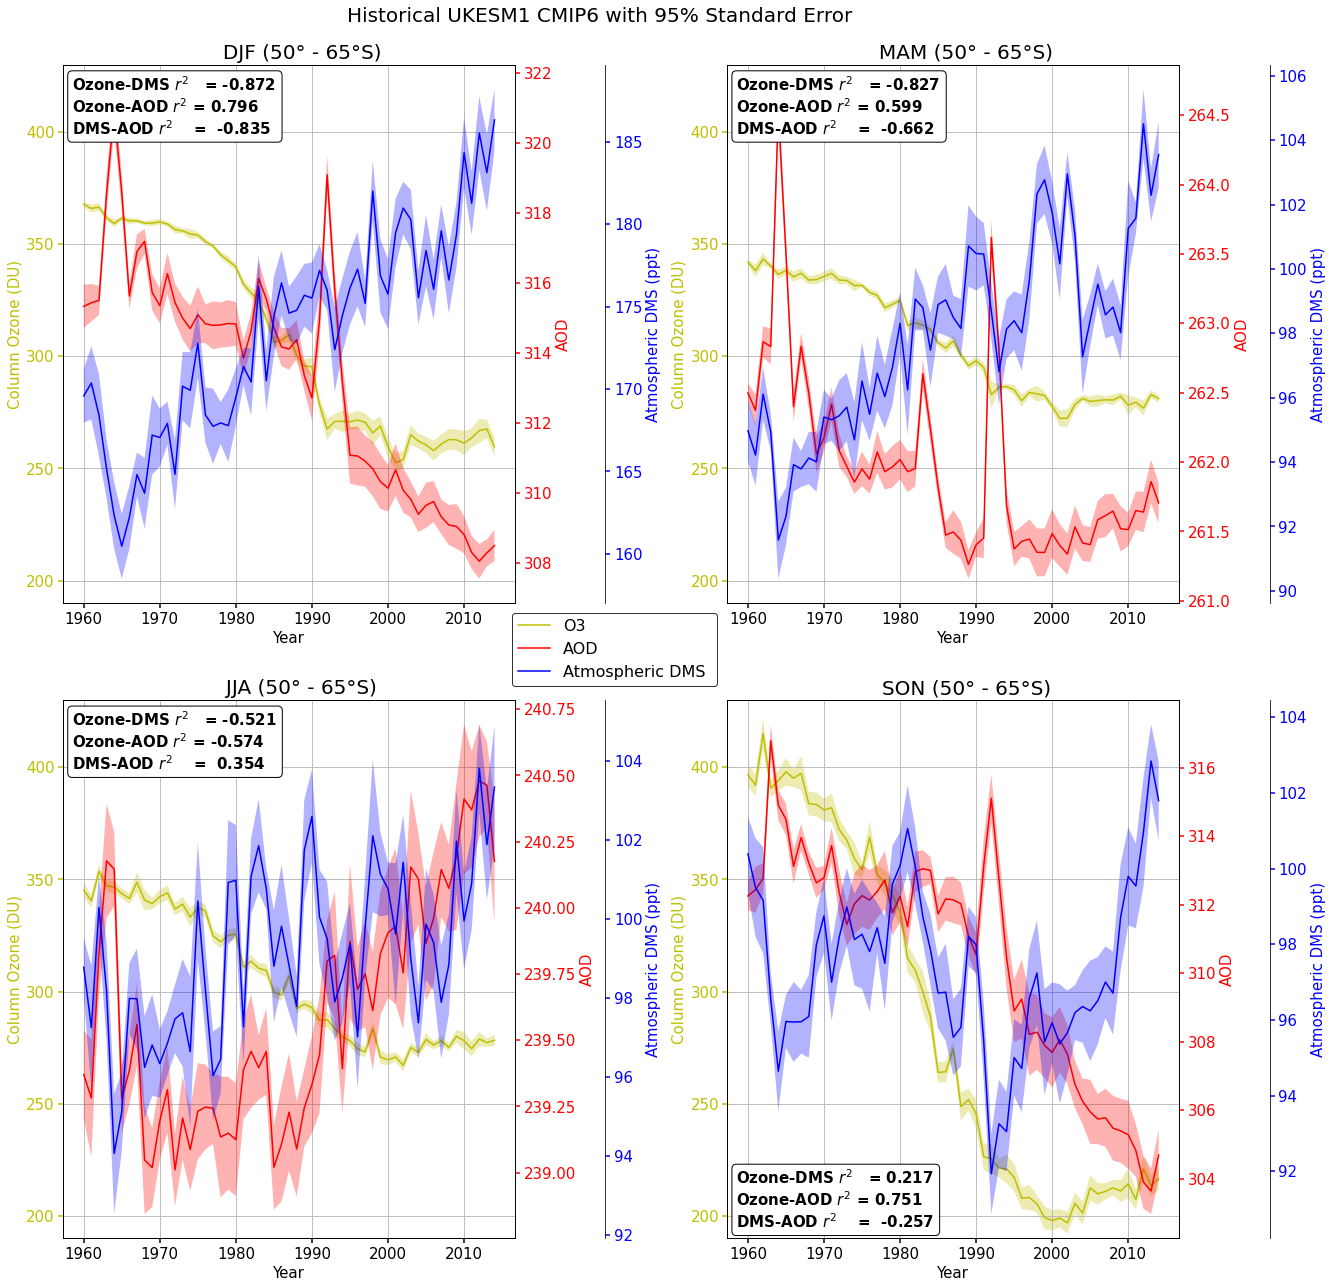

In [272]:
                                    ### AOD, DMS, OZONE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas in zip(axes,Var,Var_DMS,season_global_var,season_type):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
    par2 = axe.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var
    DMS=np.nanmean(global_var[dm][:,110:165,19:32]*DMS_ppt,axis=(0,2,3))
    DMS_error=np.nanmean(global_var[dm][:,110:165,19:32]*DMS_ppt,axis=(2,3))
    DMS_Error=standard(DMS_error)
    
    Oceanic_DMS=np.nanmean(global_var[r][:,110:165,19:32],axis=(0,2,3))
    Oceanic_DMS_error=np.nanmean(global_var[r][:,110:165,19:32],axis=(2,3))
    Oceanic_DMS_Error=standard(Oceanic_DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(month_variable[oz][:,110:165],axis=(0,2,3))
    Ozone_error=np.nanmean(month_variable[oz][:,110:165],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ")
    par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "AOD")
    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "O3")
    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
    par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    par1.set_ylabel("AOD",fontsize=15)
    # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Column Ozone (DU)",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2,p3]
#     if seas == 'SON' !=-1:
#         plt.text(1850,320,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,310,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,300,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#         plt.text(1850,420,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-AOD $r^2$ = {} \n'
                 'DMS-AOD $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
          plt.text(0.02,0.87,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-AOD $r^2$ = {} \n'
                 'DMS-AOD $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
    plt.title("     {} (50\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) ".format(seas),fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/UKESM1_90-60S_Oceanic_DMS_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_AOD_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')


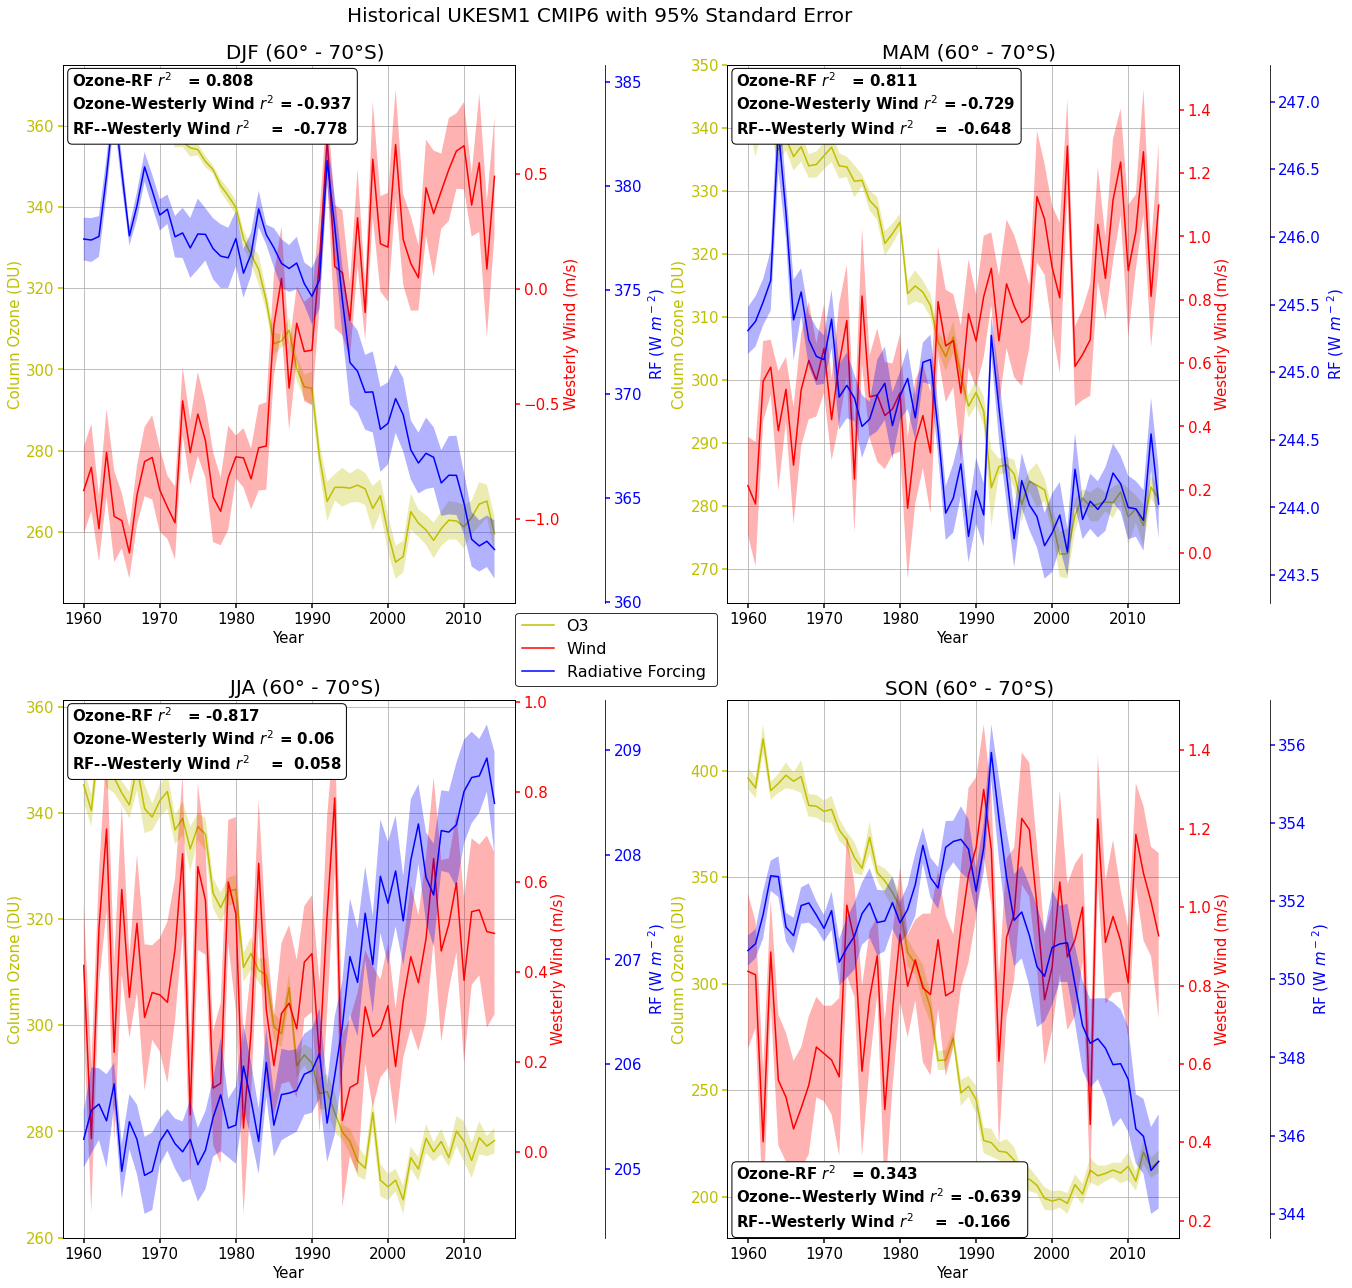

In [229]:
                                    ### AOD, DMS, OZONE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

lat=lats[19:32]
Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2
#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas in zip(axes,season_var,Var_DMS,season_global_var,season_type):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
    par2 = axe.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var
    DMS=np.nanmean(global_var[r][:,110:165,15:24],axis=(0,2,3))
    DMS_error=np.nanmean(global_var[r][:,110:165,15:24],axis=(2,3))
    DMS_Error=standard(DMS_error)
    
    Oceanic_DMS=np.nanmean(global_var[w][:,110:165,15:24],axis=(0,2,3))
    Oceanic_DMS_error=np.nanmean(global_var[w][:,110:165,15:24],axis=(2,3))
    Oceanic_DMS_Error=standard(Oceanic_DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(month_variable[oz][:,110:165],axis=(0,2,3))
    Ozone_error=np.nanmean(month_variable[oz][:,110:165],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par2.plot(year1,DMS,'b-', label = "Radiative Forcing ")
    par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "Wind")
    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "O3")
    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
    par2.set_ylabel("RF (W $m^-$$^2$)",fontsize=15)
    par1.set_ylabel("Westerly Wind (m/s)",fontsize=15)
    # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Column Ozone (DU)",fontsize=15)
#    par1.set_ylabel("RF (W $m^-$$^2$)",fontsize=15)
    # host.set_ylabel("Oceanic DMS (nM)",fontsize=15)
  #  axe.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)




    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2,p3]
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-RF $r^2$   = {} \n' 
                 'Ozone--Westerly Wind $r^2$ = {} \n'
                 'RF--Westerly Wind $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
          plt.text(0.02,0.87,
                 'Ozone-RF $r^2$   = {} \n' 
                 'Ozone-Westerly Wind $r^2$ = {} \n'
                 'RF--Westerly Wind $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
        
    plt.title("     {} (60\N{DEGREE SIGN} - 70\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50-65S_Wind_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_60-70S_Wind_RF_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')


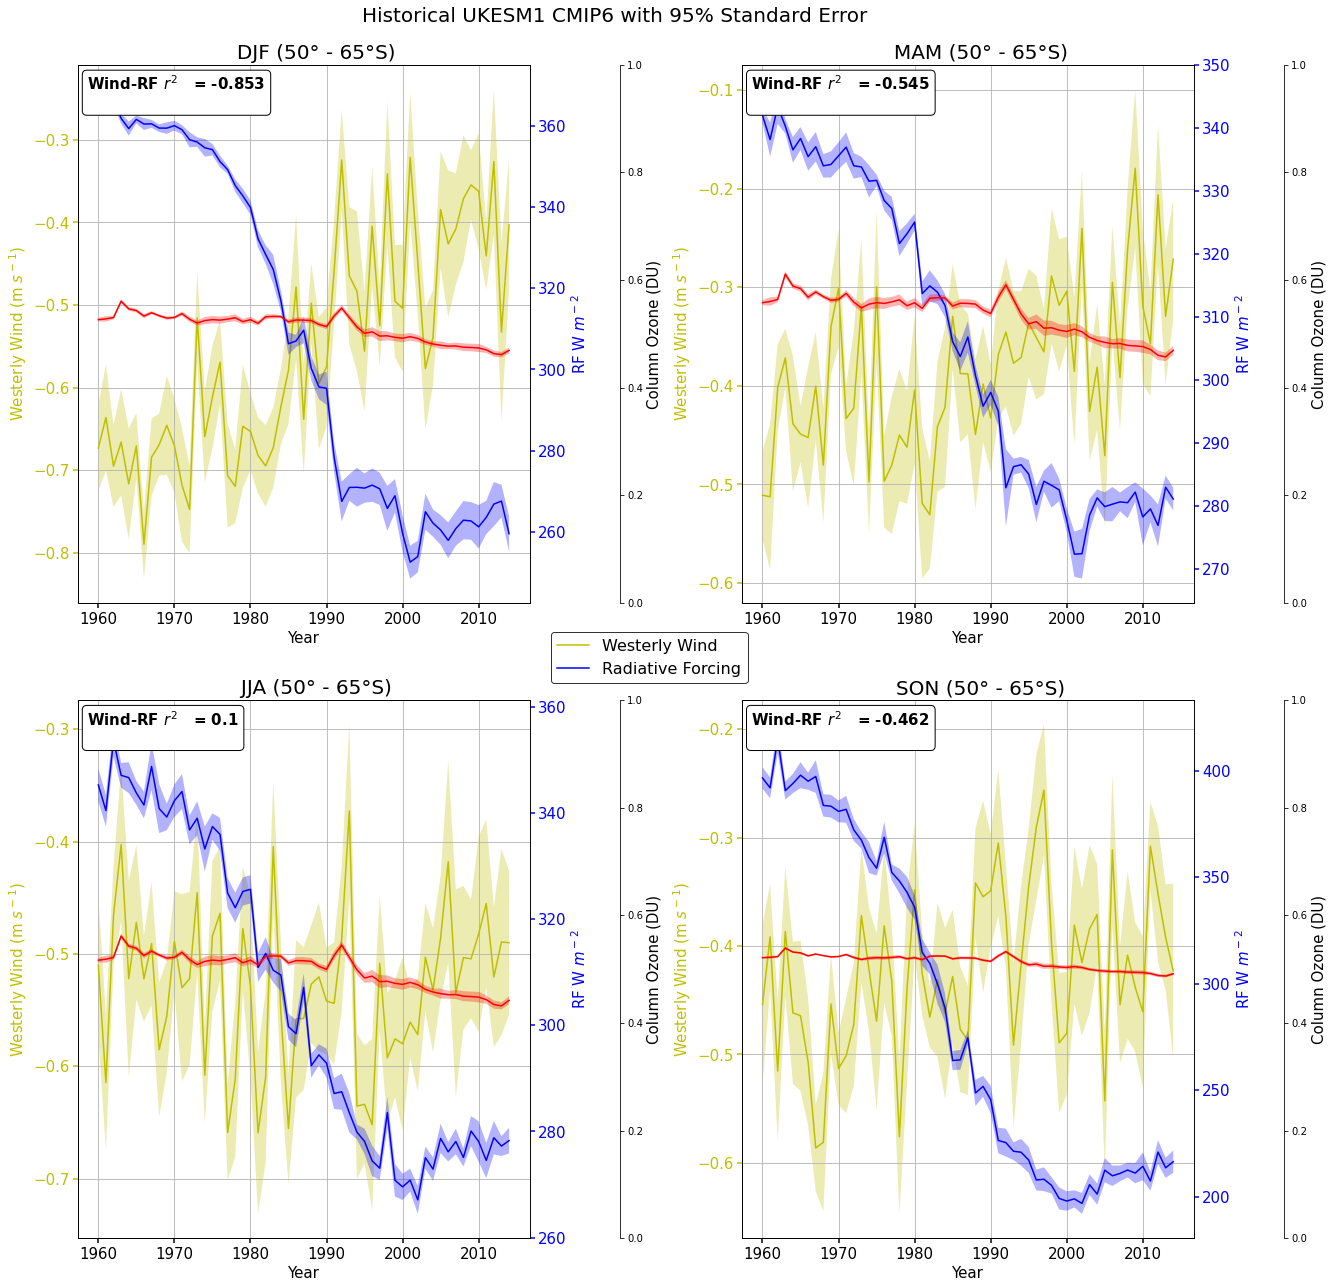

In [219]:
                                    ### AOD, DMS, OZONE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas in zip(axes,Var,Var_DMS,season_global_var,season_type):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
 #   par2 = axe.twinx()
 #   par2.spines["right"].set_position(("axes", 1.2))
#     par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var
    DMS=np.nanmean(global_var[r][:,110:165,15:24],axis=(0,2,3))
    DMS_error=np.nanmean(global_var[r][:,110:165,15:24],axis=(2,3))
    DMS_Error=standard(DMS_error)
    
#     DMS=np.nanmean(global_var[od][:,110:165,84:113]* 1000000,axis=(0,2,3))
#     DMS_error=np.nanmean(global_var[od][:,110:165,84:113]* 1000000,axis=(2,3))
#     DMS_Error=standard(DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(global_var[w][:,110:165,15:24],axis=(0,2,3))
    Ozone_error=np.nanmean(global_var[w][:,110:165,15:24],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par1.plot(year1,DMS,'b-', label = "Radiative Forcing  ")
    par1.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

  #  p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "AOD")
#    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "Westerly Wind")
    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
#     par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    par1.set_ylabel("RF W $m^-$$^2$",fontsize=15)
    # host.set_ylabel("Oceanic DMS (nM)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
   # axe.set_ylabel("W $m^-$$^2$",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p3.get_color())
#     par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
#     par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1,p3]
#     if seas == 'SON' !=-1:
#         plt.text(1850,320,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,310,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,300,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#         plt.text(1850,420,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    plt.text(0.02,0.92,
                 'Wind-DMS $r^2$   = {} \n' 
                 .format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)))                            
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
    plt.title("     {} (50\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) ".format(seas),fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.5, -0.039),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/UKESM1_90-60S_Oceanic_DMS_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_DMS_Wind_TWO_VARIABLES.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_60_70S_ODMS_RF_TWO_VARIABLE.png",dpi=600,bbox_inches = 'tight')


# **CORRELATION COEFFICIENT DIAGRAMS**

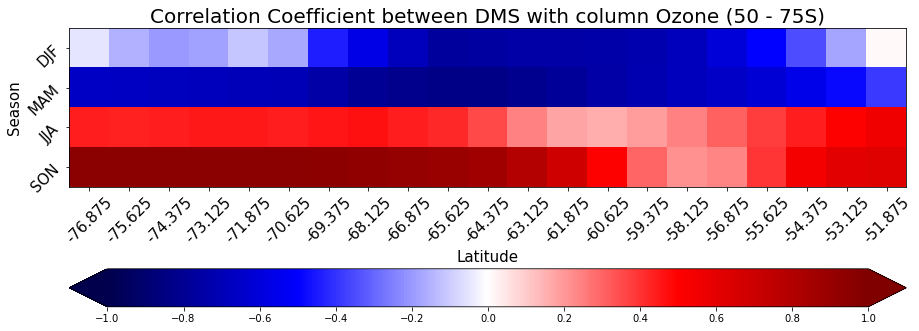

<ipython-input-105-cbe7896fa7c7>:11: RuntimeWarning: Mean of empty slice
  vari=np.nanmean(var[i],axis=0)


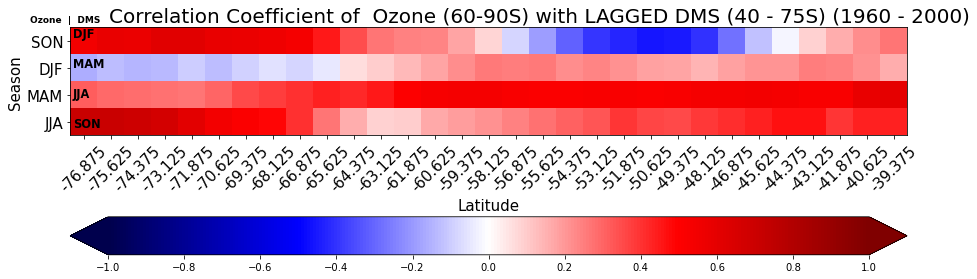

In [105]:
files=[]
#AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]
var=[]
Regi=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/50_65/*"))
for f in (Regi):
    reg_filey=np.load(f)
    var.append(reg_filey)
#test=[]
SO=[]
for i in range(0,5):
    vari=np.nanmean(var[i],axis=0)
    SO.append(vari)
    
wind=SO[4]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6
ODMS=[DJF_global_var[od],MAM_global_var[od],JJA_global_var[od],SON_global_var[od]]
ODMS=np.array(ODMS)
ODMS_so=[ODMS[:,:,:,46],ODMS[:,:,:,51],ODMS[:,:,:,56],ODMS[:,:,:,61],ODMS[:,:,:,65],ODMS[:,:,:,69],ODMS[:,:,:,72],
         ODMS[:,:,:,76],ODMS[:,:,:,79],ODMS[:,:,:,82],ODMS[:,:,:,85],ODMS[:,:,:,88],ODMS[:,:,:,91],ODMS[:,:,:,93],
         ODMS[:,:,:,96],ODMS[:,:,:,98],ODMS[:,:,:,101],ODMS[:,:,:,103],ODMS[:,:,:,105],ODMS[:,:,:,107],ODMS[:,:,:,109],
         ODMS[:,:,:,111],ODMS[:,:,:,113],ODMS[:,:,:,115],ODMS[:,:,:,117],ODMS[:,:,:,119],ODMS[:,:,:,120],ODMS[:,:,:,122],
         ODMS[:,:,:,124],ODMS[:,:,:,126],ODMS[:,:,:,127]]

## FOR Oceanic DMS 
# ODMS_so=np.array(ODMS_so)
# odms=ODMS_so.transpose(2,3,1,0,4)
# ODMS_50_mean=np.nanmean(odms[:,110:151,:],axis=(4))

        #Ozone=[DJF_var[3],MAM_var[3],JJA_var[3],SON_var[3]]
# Ozone=[DJF_global_var[od],MAM_global_var[od],JJA_global_var[od],SON_global_var[od]]

# Ozone=np.nanmean(Ozone,axis=1)
# Ozoney=Ozone.transpose(1,0,2,3)
# Ozone_mean_2d=np.nanmean(Ozoney,axis=(2,3))
# #Ozone_mean_2d=np.nanmean(Ozone_mean,axis=(2))

#############################################################################################
## FOR OZONE 
Wind_corr=(season_var[3][oz],season_var[0][oz],season_var[1][oz],season_var[2][oz])
Ozone=np.nanmean(Wind_corr,axis=1)
Ozone=np.array(Wind_corr)
Ozoney=Ozone.transpose(1,2,0,3,4)
#Windy=Wind.transpose(1,0,2,3) 
Ozone_mean=areaweight(Ozoney,lats[0:24])[:,110:150]
#(Ozoney[:,110:150,:,:],axis=(3,4))
#############################################################################################

#Wind_corr=[SON_global_var[oz],DJF_global_var[oz],MAM_global_var[oz],JJA_global_var[oz]]
# Wind=np.nanmean(Wind_corr,axis=1)
# Windyy=np.array(Wind_corr)
# Windy=Windyy.transpose(1,2,0,3,4)
# #Windy=Wind.transpose(1,0,2,3) 
# Wind_50_mean=np.nanmean(Windy[:,110:150,:,10:41],axis=(4))

#DMS_corr=[SON_global_var[dm],DJF_global_var[dm],MAM_global_var[dm],JJA_global_var[dm]]
DMS_corr=[DJF_global_var[dm],MAM_global_var[dm],JJA_global_var[dm],SON_global_var[dm]]
#season_global_var
DMS=np.nanmean(DMS_corr,axis=1)
DMSyy=np.array(DMS_corr)
#DMSy=DMS_corr.transpose(1,0,2,3,4)
DMSy=DMSyy.transpose(1,2,0,3,4)

DMS_mean_2d=np.nanmean(DMSy[:,110:150,:,10:41],axis=(4)) # (13,55,4,31)

a=np.empty((4,31)); a[:]=np.nan
#for e in range(0,13):
for t in range(0,40):
    for i in range(0,4):
        for x in range(0,31):
         #   b[t,i,x]=(np.corrcoef(DMS_mean_2d[:,t,i,x],Wind_50_mean[:,t,i,x]))[1,0]
            a[i,x]=(np.corrcoef(DMS_mean_2d[:,t,i,x],Ozone_mean[:,t,i]))[1,0]
            
lat=np.array([-76.875, -75.625, -74.375, -73.125, -71.875, -70.625, -69.375, -68.125,
       -66.875, -65.625, -64.375, -63.125, -61.875, -60.625, -59.375, -58.125,
       -56.875, -55.625, -54.375, -53.125, -51.875, -50.625, -49.375, -48.125,
       -46.875, -45.625, -44.375, -43.125, -41.875, -40.625, -39.375])

aa=np.nanmean(a,axis=0)


orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
## MEAN OZONE (165,4) AT 60-90 CORRELATED WITH DMS AT 55 - 65 (165,4,12)
fig = plt.figure(figsize=(15,10), edgecolor='w')
ax = fig.add_subplot(1,1,1)
#ax.set_xticklabels((lat),fontsize=10)
ax.set_xticks(np.arange(0,32,1))
ax.set_xticklabels(lat,fontsize=15,rotation=45)
ax.set_xlabel("Latitude",fontsize=15)
seas=['SON','DJF','MAM', 'JJA']
ax.set_yticks((0,1,2,3))
ax.set_yticklabels((seas),fontsize=15)
ax.set_ylabel("Season",fontsize=15)

plt.text(-0.4,3.2,
                 'DJF    \n \nMAM    \n\nJJA    \n\nSON'
                                      
                 ,color='black',fontsize=11.4,fontweight='bold')

plt.text(-2,-0.7,
                 'Ozone  |  DMS'
                          ,color='black',fontsize=9,fontweight='bold')
clevs=np.arange(-1,1.1,0.1)

cs=ax.imshow(a,cmap='seismic',vmin=clevs[0],vmax=clevs[-1])

cbar=fig.colorbar(cs,extend='both',orientation='horizontal',ticks=np.arange(-1,1.1,0.2))
plt.title('                Correlation Coefficient of  Ozone (60-90S) with LAGGED DMS (40 - 75S) (1960 - 2000)',fontsize=20)
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/1960_2000/Lagged/UKESM1_corrcoef_40-75S_Ozone_vs_LAGGED_DMS_2000.png",dpi=600,bbox_inches = 'tight')


<ipython-input-484-2e08c0ae9f47>:11: RuntimeWarning: Mean of empty slice
  vari=np.nanmean(var[i],axis=0)


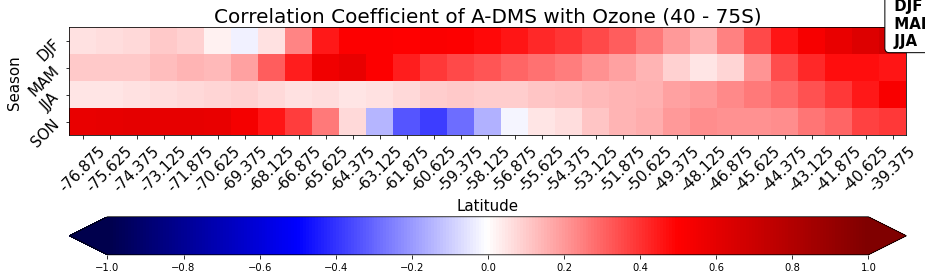

In [484]:
files=[]
#AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]
var=[]
Regi=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/50_65/*"))
for f in (Regi):
    reg_filey=np.load(f)
    var.append(reg_filey)
#test=[]
SO=[]
for i in range(0,5):
    vari=np.nanmean(var[i],axis=0)
    SO.append(vari)
    
wind=SO[4]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

#Ozone=[DJF_var[3],MAM_var[3],JJA_var[3],SON_var[3]]
Ozone=[DJF_global_var[oz],MAM_global_var[oz],JJA_global_var[oz],SON_global_var[oz]]

Ozone=np.nanmean(Ozone,axis=1)
Ozoney=Ozone.transpose(1,0,2,3)
Ozone_mean_2d=np.nanmean(Ozoney,axis=(2,3))
#Ozone_mean_2d=np.nanmean(Ozone_mean,axis=(2))

Wind_corr=[DJF_global_var[w],MAM_global_var[w],JJA_global_var[w],SON_global_var[w]]
Wind=np.nanmean(Wind_corr,axis=1)
Windyy=np.array(Wind_corr)
Windy=Windyy.transpose(1,2,0,3,4)
#Windy=Wind.transpose(1,0,2,3)
Wind_50_mean=np.nanmean(Windy[:,110:165,:,10:41],axis=(4))

# Wind_corr=[DJF_global_var[od],MAM_global_var[od],JJA_global_var[od],SON_global_var[od]]
# Wind=np.nanmean(Wind_corr,axis=1)
# Windyy=np.array(Wind_corr)
# Windy=Windyy.transpose(1,2,0,3,4)
# #Windy=Wind.transpose(1,0,2,3)
# Wind_50_mean=np.nanmean(Windy[:,110:165,:,10:41],axis=(4)

DMS_corr=[DJF_global_var[dm],MAM_global_var[dm],JJA_global_var[dm],SON_global_var[dm]]
#season_global_var
DMS=np.nanmean(DMS_corr,axis=1)
DMSyy=np.array(DMS_corr)
#DMSy=DMS_corr.transpose(1,0,2,3,4)
DMSy=DMSyy.transpose(1,2,0,3,4)

DMS_mean_2d=np.nanmean(DMSy[:,110:165,:,10:41],axis=(4))

# wind=SO[4]
# Wind_50_mean=np.nanmean(wind,axis=3)

# DMS_50=SO[1]
# DMS_50_mean=np.nanmean(DMS_50,axis=3)
a=np.empty((4,31)); a[:]=np.nan
for i in range(0,4):
    for x in range(0,31):
        a[i,x]=np.corrcoef(DMS_mean_2d[:,:,i,x],Wind_50_mean[:,:,i,x])[1,0]
        #test.append(b)
#         #a[i,:]=b
# lat=np.array([-64.375, -63.125, -61.875, -60.625, -59.375, -58.125, -56.875, -55.625,
#        -54.375, -53.125, -51.875, -50.625])
# lat=np.array([-76.875, -75.625, -74.375, -73.125, -71.875, -70.625, -69.375, -68.125,
#        -66.875, -65.625, -64.375, -63.125, -61.875, -60.625, -59.375, -58.125,
#        -56.875, -55.625, -54.375, -53.125, -51.875])
lat=np.array([-76.875, -75.625, -74.375, -73.125, -71.875, -70.625, -69.375, -68.125,
       -66.875, -65.625, -64.375, -63.125, -61.875, -60.625, -59.375, -58.125,
       -56.875, -55.625, -54.375, -53.125, -51.875, -50.625, -49.375, -48.125,
       -46.875, -45.625, -44.375, -43.125, -41.875, -40.625, -39.375])

orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
## MEAN OZONE (165,4) AT 60-90 CORRELATED WITH DMS AT 55 - 65 (165,4,12)
fig = plt.figure(figsize=(15,10), edgecolor='w')
ax = fig.add_subplot(1,1,1)

#ax.set_xticklabels((lat),fontsize=10)
ax.set_xticks(np.arange(0,32,1))
ax.set_xticklabels(lat,fontsize=15,rotation=45)
ax.set_xlabel("Latitude",fontsize=15)
seas=['DJF','MAM', 'JJA', 'SON']
ax.set_yticks((0,1,2,3))
ax.set_yticklabels((seas),fontsize=15,rotation=45)
ax.set_ylabel("Season",fontsize=15)


        
clevs=np.arange(-1,1.1,0.1)

cs=ax.imshow(a,cmap='seismic',vmin=clevs[0],vmax=clevs[-1])

cbar=fig.colorbar(cs,extend='both',orientation='horizontal',ticks=np.arange(-1,1.1,0.2))
plt.title('Correlation Coefficient of A-DMS with Ozone (40 - 75S)',fontsize=20)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/UKESM1_corrcoef_40-75S_DMS_vs_Ozone.png",dpi=600,bbox_inches = 'tight')


## **Zonal Mean**

<ipython-input-41-bf91d6c1c685>:60: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,lat_sh,var,clev,cmap='seismic',label=unit,extend="both")


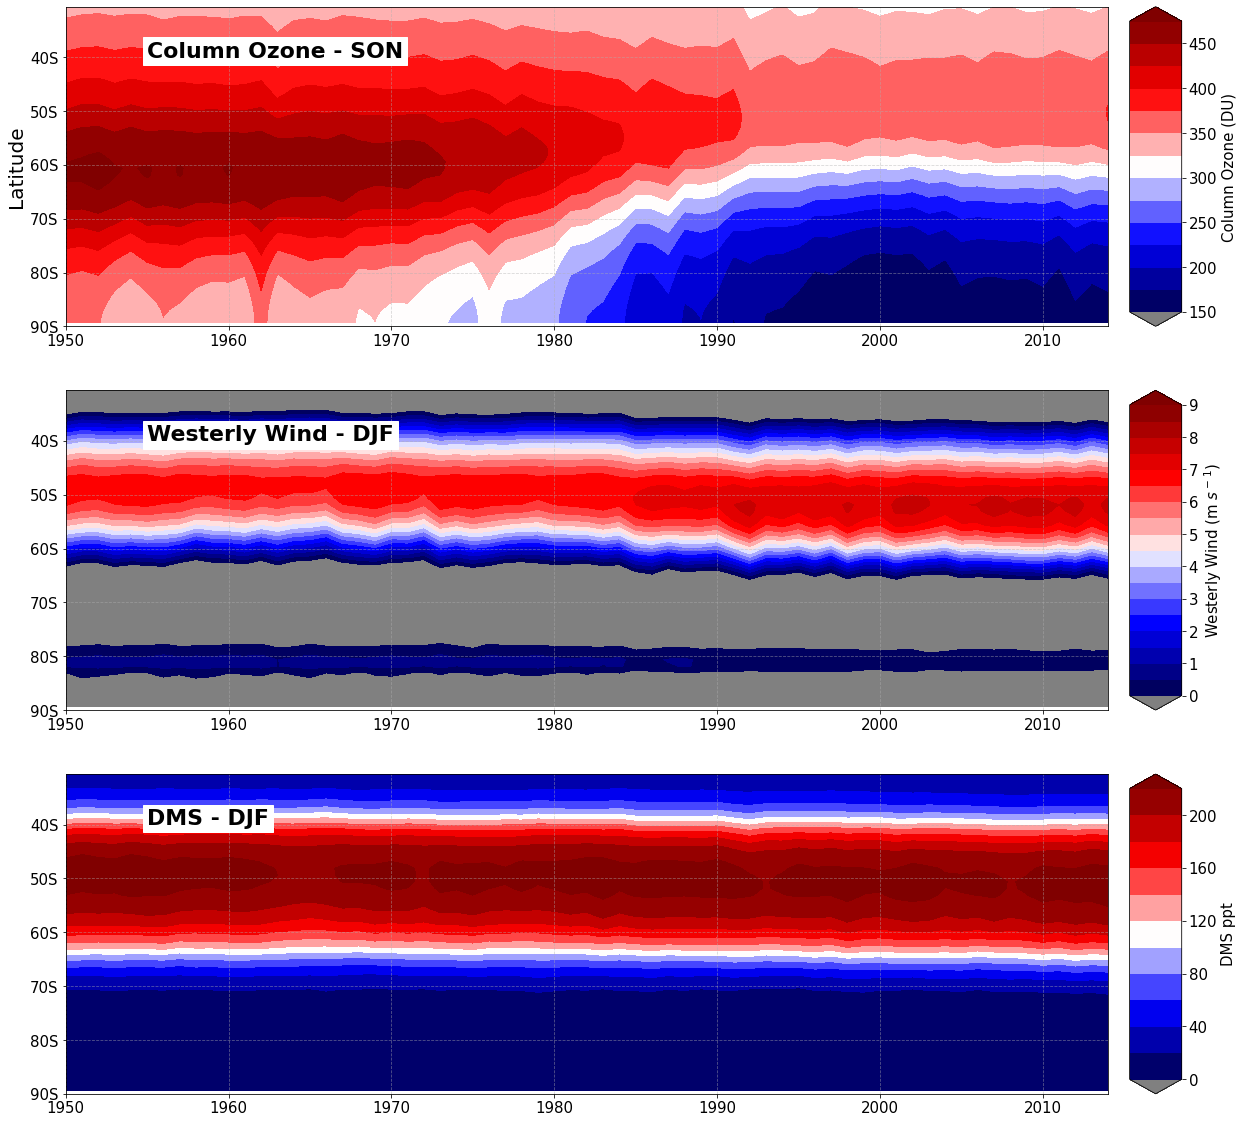

In [41]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020

@author: ybh10
"""
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

#ideas: Try and get two variables on one plot.
## 1) get the climatological mean, and do zonal difference from the mean/STD across time 
## 2) Grab the % difference from 1 for 2 variables, then minus/do something with the difference to see how they relate?

### For Useful shortcuts ###
###   [DJF_global_var[w],MAM_global_var[w],JJA_global_var[w],SON_global_var[w]]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6


Ozone_zonal=np.nanmean(SON_global_var[oz][:,100:165,0:48,:],axis=(0,3))
Wind_zonal=np.nanmean(DJF_global_var[w][:,100:165,0:48,:],axis=(0,3))
DMS_zonal=np.nanmean(DJF_global_var[dm][:,100:165,0:48,:],axis=(0,3))*DMS_ppt

Ozone_zonal=np.array(Ozone_zonal); Ozone_zonal=Ozone_zonal.transpose(1,0)
Wind_zonal=np.array(Wind_zonal); Wind_zonal=Wind_zonal.transpose(1,0)
DMS_zonal=np.array(DMS_zonal); DMS_zonal=DMS_zonal.transpose(1,0)


variable=[Ozone_zonal,Wind_zonal,DMS_zonal]
texts=['Column Ozone - SON','Westerly Wind - DJF','DMS - DJF']
units=['Column Ozone (DU)','Westerly Wind (m $s^-$$^1$)','DMS ppt']
fig = plt.figure(figsize=(20,20), edgecolor='w')
ax1 = fig.add_subplot(3,1,1); ax2 = fig.add_subplot(3,1,2); ax3 = fig.add_subplot(3,1,3)
axes=[ax1,ax2,ax3]
#plt.subplots_adjust(hspace=0.05, wspace=0.15)
clevs=np.arange(150,500,25)
clevs1=np.arange(0,9.5,.5)
clevs2=np.arange(0,240,20)
clevy=[clevs,clevs1,clevs2]
for var, clev, axe,text,unit in zip(variable,clevy,axes,texts,units):

    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
    axe.grid(linestyle='--',alpha=0.5)
# ax2.grid(linestyle='--',alpha=0.5)
# ax3.grid(linestyle='--',alpha=0.5)
    ax1.set_ylabel('Latitude',fontsize=20)
# ax2.set_ylabel('Latitude',fontsize=20)
# ax3.set_ylabel('Latitude',fontsize=20)
    y_labels = ['90S','80S','70S','60S','50S','40S']
    y=np.arange(-90,-30,10)

    x=np.arange(1950,2015,10)  

    cs = axe.contourf(Dates,lat_sh,var,clev,cmap='seismic',label=unit,extend="both")
    cs.cmap.set_under('grey')
#     if var < clev:
#         cs == 'grey'
# cs1= ax2.contourf(Dates,lat_sh,Wind_zonal,cmap='seismic')
# cs2 = ax3.contourf(Dates,lat_sh,DMS_zonal,cmap='seismic')
    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
# ax2.set_yticks(y)
# ax2.set_yticklabels(y_labels)
# ax3.set_yticks(y)
# ax3.set_yticklabels(y_labels)
    t=axe.text(1955,-40,text,color='black',fontsize=22,fontweight='bold')
#t=ax2.text(0.2,-35,'2020 Average',color='r',fontsize=22,fontweight='bold')
#t=ax3.text(0.2,-35,'Relative Difference',color='r',fontsize=22,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
# cax = fig.add_axes([0.94,0.54,0.03,0.38]) # Left, Bottom, Width, Height
# cbar = fig.colorbar(cs,cax=cax,extend='both')
# cbar.ax.set_ylabel('DU',fontsize=25)

# cax = fig.add_axes([0.94,0.54,0.03,0.34]) # Left, Bottom, Width, Height
# cbar = fig.colorbar(cs1,cax=cax,extend='both')
# cbar.ax.set_ylabel('Wind',fontsize=25)
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
#cax = fig.add_axes([0.94,0.125,0.03,0.34]) # Left, Bottom, Width, Height
#cbar = fig.colorbar(cs2,cax=cax,extend='both')
    cbar.ax.set_ylabel(unit,fontsize=15)
    cbar.ax.tick_params(labelsize=15)

# plt.show()
plt.show()
#plt.savefig("MODIS/2019-2020_aod_dtdp/PLOTS/zonal_SH.png",dpi=600,bbox_inches = 'tight')


(13, 65, 48, 192)
-69.68776763585898
(13, 65, 48, 192)
0.11796370648422563
(13, 65, 48, 192)
-2.267389039597725
(13, 65, 48, 192)
0.007475229822269259


<ipython-input-149-681b2e678d9b>:87: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,lat_sh,variable_check,clev_test,cmap=color,label=unit,extend='both')


Text(0.5, 0.9, 'Zonal Mean: Yearly Difference of 1950-2014 minus climatology (1850 - 1940)')

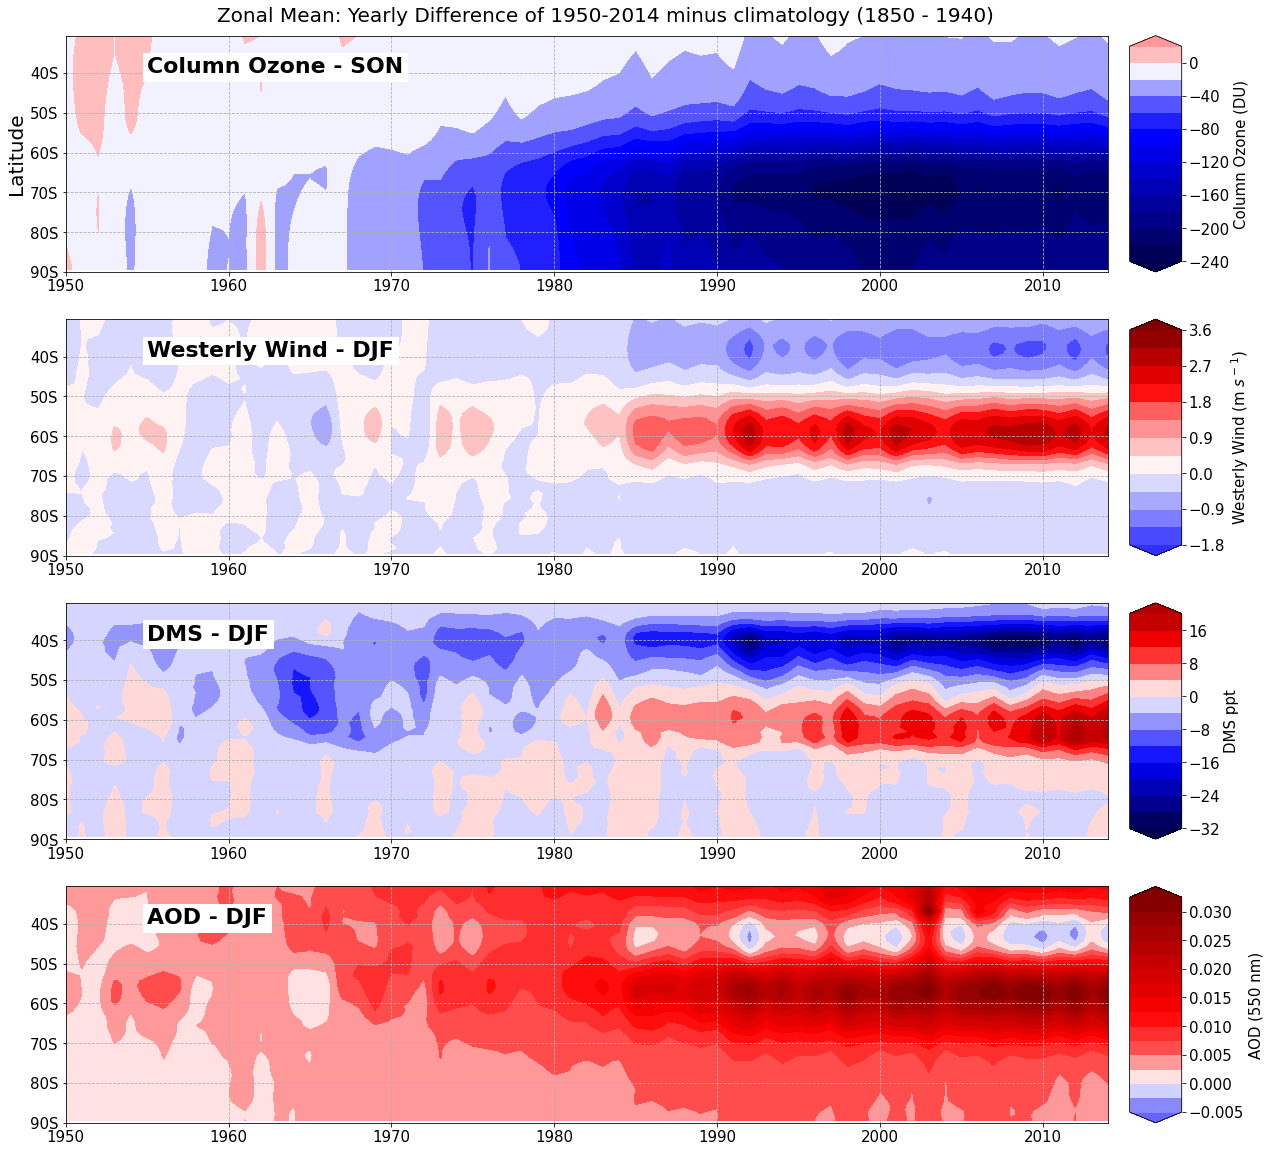

In [149]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020

@author: ybh10
"""
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

## ideas: Try and get two variables on one plot.
# # 1) get the climatological mean, and do zonal difference from the mean/STD across time 
# # 2) Grab the % difference from 1 for 2 variables, then minus/do something with the difference to see how they relate?

# ## For Useful shortcuts ###
# ##   [DJF_global_var[w],MAM_global_var[w],JJA_global_var[w],SON_global_var[w]]

## Ozone_zonal=np.nanmean(SON_global_var[oz][:,100:165,0:48,:],axis=(0,3))
## Wind_zonal=np.nanmean(DJF_global_var[w][:,100:165,0:48,:],axis=(0,3))
## DMS_zonal=np.nanmean(DJF_global_var[dm][:,100:165,0:48,:],axis=(0,3))*DMS_ppt
## AOD_zonal=np.nanmean(DJF_global_var[ad][:,100:165,0:48,:],axis=(0,3))
## RF_zonal=np.nanmean(DJF_global_var[r][:,100:165,0:48,:],axis=(0,3))
## variable=[Ozone_zonal,Wind_zonal,DMS_zonal,AOD_zonal]#,RF_zonal]


## ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6
# numbers=[oz,w,dm,ad]#,r]
# large_data=[SON_global_var,DJF_global_var,DJF_global_var,DJF_global_var]#,DJF_global_var]

# maybe=[]
# #for e in range(0,13):
# for num,datas in zip(numbers,large_data):
#     old_vari=np.nanmean(datas[num][:,0:91,0:48,:],axis=(0,1,3))
#     vari=np.empty((13, 65, 48, 192)); vari[:]=np.nan
#     for t in range(0,vari.shape[0]):
#         for i in range(0,vari.shape[1]):
#             for l in range(0,vari.shape[2]):
#                 for x in range(0,vari.shape[3]):
#                   #  print('hi')
#                     if num == (numbers[2]):
#                         vari[t,i,l,x]=(datas[num][t,i+100,l,x]-old_vari[l])*DMS_ppt
#                     else:
#                         vari[t,i,l,x]=(datas[num][t,i+100,l,x]-old_vari[l])
#     print(np.shape(vari))
#     print(np.nanmean(vari))
#     see=np.nanmean(vari,axis=(0,3))
#     maybe.append(see)
# maybe=np.array(maybe)
# maybe=maybe.transpose(0,2,1)


texts=['Column Ozone - SON','Westerly Wind - DJF','DMS - DJF','AOD - DJF']#,'RF - DJF']
units=['Column Ozone (DU)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
fig = plt.figure(figsize=(20,20), edgecolor='w')
n=4
ax1 = fig.add_subplot(n,1,1); ax2 = fig.add_subplot(n,1,2); ax3 = fig.add_subplot(n,1,3);ax4 = fig.add_subplot(n,1,4)#;ax5 = fig.add_subplot(n,1,5)
axes=[ax1,ax2,ax3,ax4]#,ax5]
#plt.subplots_adjust(hspace=0.05, wspace=0.15)
clevs=np.arange(-240,40,20) # Ozone
#clevs4=np.arange(0,9.5,.5)# RF
clevs1=np.arange(-1.8,3.8,.45)# Wind
clevs2=np.arange(-32,24,4) # DMS
clevs3=np.arange(-0.005,0.035,0.0025) # AOD

clevy=[clevs,clevs1,clevs2,clevs3]#,clevs4]
orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')

shift_map=[shifted_cmap_modis,shifted_cmap_wind,shifted_cmap_dms,shifted_cmap_aod]
for clev_test, axe,text,unit,variable_check,color in zip(clevy,axes,texts,units,maybe,shift_map):

    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
    axe.grid(linestyle='--',alpha=1)
    ax1.set_ylabel('Latitude',fontsize=20)
    y_labels = ['90S','80S','70S','60S','50S','40S']
    y=np.arange(-90,-30,10)
    x=np.arange(1950,2015,10)    
    cs = axe.contourf(Dates,lat_sh,variable_check,clev_test,cmap=color,label=unit,extend='both')
    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    t=axe.text(1955,-40,text,color='black',fontsize=22,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    cbar.ax.set_ylabel(unit,fontsize=15)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('Zonal Mean: Yearly Difference of 1950-2014 minus climatology (1850 - 1940)',y=0.9,fontsize=20)

# plt.show()
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/Zonal/Zonal_Difference_5_Variables_cmap.png",dpi=600,bbox_inches = 'tight')


In [193]:
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8
numbers=[oz,ad,dm]#,r] # ad chosen for ODMS due to the array having a 'one' at the start - easy to put in loop

# FOR Oceanic DMS 
hi=np.empty((1, 13, 165, 360)); hi[:]=np.nan
ODMS=[SON_global_var[od]]
ODMS=np.array(ODMS)*ODMS_ppm
ODMS_so=[hi,hi,hi,hi,ODMS[:,:,:,0],ODMS[:,:,:,9],ODMS[:,:,:,19],ODMS[:,:,:,26],ODMS[:,:,:,34],ODMS[:,:,:,40],ODMS[:,:,:,46],
         ODMS[:,:,:,51],ODMS[:,:,:,56],ODMS[:,:,:,61],ODMS[:,:,:,65],ODMS[:,:,:,69],ODMS[:,:,:,72],ODMS[:,:,:,76],
         ODMS[:,:,:,79],ODMS[:,:,:,82],ODMS[:,:,:,85],ODMS[:,:,:,88],ODMS[:,:,:,91],ODMS[:,:,:,93],ODMS[:,:,:,96],
         ODMS[:,:,:,98],ODMS[:,:,:,101],ODMS[:,:,:,103],ODMS[:,:,:,105],ODMS[:,:,:,107],ODMS[:,:,:,109],ODMS[:,:,:,111],
         ODMS[:,:,:,113],ODMS[:,:,:,115],ODMS[:,:,:,117],ODMS[:,:,:,119],ODMS[:,:,:,120],ODMS[:,:,:,122],ODMS[:,:,:,124],
         ODMS[:,:,:,126],ODMS[:,:,:,127],ODMS[:,:,:,128],ODMS[:,:,:,130],ODMS[:,:,:,132],ODMS[:,:,:,133],ODMS[:,:,:,135],
        ODMS[:,:,:,137],ODMS[:,:,:,138]]

ODMS_so=np.array(ODMS_so)
odms=ODMS_so.transpose(1,2,3,0,4)

large_data=[SON_global_var,odms,SON_global_var]

maybe=[]
#for e in range(0,13):
for num,datas in zip(numbers,large_data):
    old_vari=np.nanmean(datas[num][:,0:91,0:48,:],axis=(0,1,3))
    vari=np.empty((13, 65, 48, datas[num].shape[3])); vari[:]=np.nan
    for t in range(0,datas[num].shape[0]):
        for i in range(0,vari[num].shape[0]):
            for l in range(0,48):
                for x in range(0,datas[num].shape[3]):
                  #  print('hi')
                    if num == (numbers[dm]):
                        vari[t,i,l,x]=(datas[num][t,i+100,l,x]-old_vari[l])*DMS_ppt
                    else:
                        vari[t,i,l,x]=(datas[num][t,i+100,l,x]-old_vari[l])
    print(np.shape(vari))
    print(np.nanmean(vari))
    see=np.nanmean(vari,axis=(0,3))
    maybe.append(see)
maybe=np.array(maybe)
maybe=maybe.transpose(0,2,1)

KeyboardInterrupt: 

(13, 65, 48)
-69.68776766534388
(13, 65, 48)
-0.055593088815903524


<ipython-input-195-cc49e1a9cc34>:54: RuntimeWarning: Mean of empty slice
  old_vari=np.nanmean(datas[num][:,0:91,0:48,:],axis=(0,1,3))
<ipython-input-195-cc49e1a9cc34>:56: RuntimeWarning: Mean of empty slice
  data=np.nanmean(datas[num],axis=(3))
<ipython-input-195-cc49e1a9cc34>:68: RuntimeWarning: Mean of empty slice
  see=np.nanmean(vari,axis=(0))


(13, 65, 48)
0.0005178587442446545
(13, 65, 48)
-4.36418179472626
(13, 65, 48)
0.008465654762871417


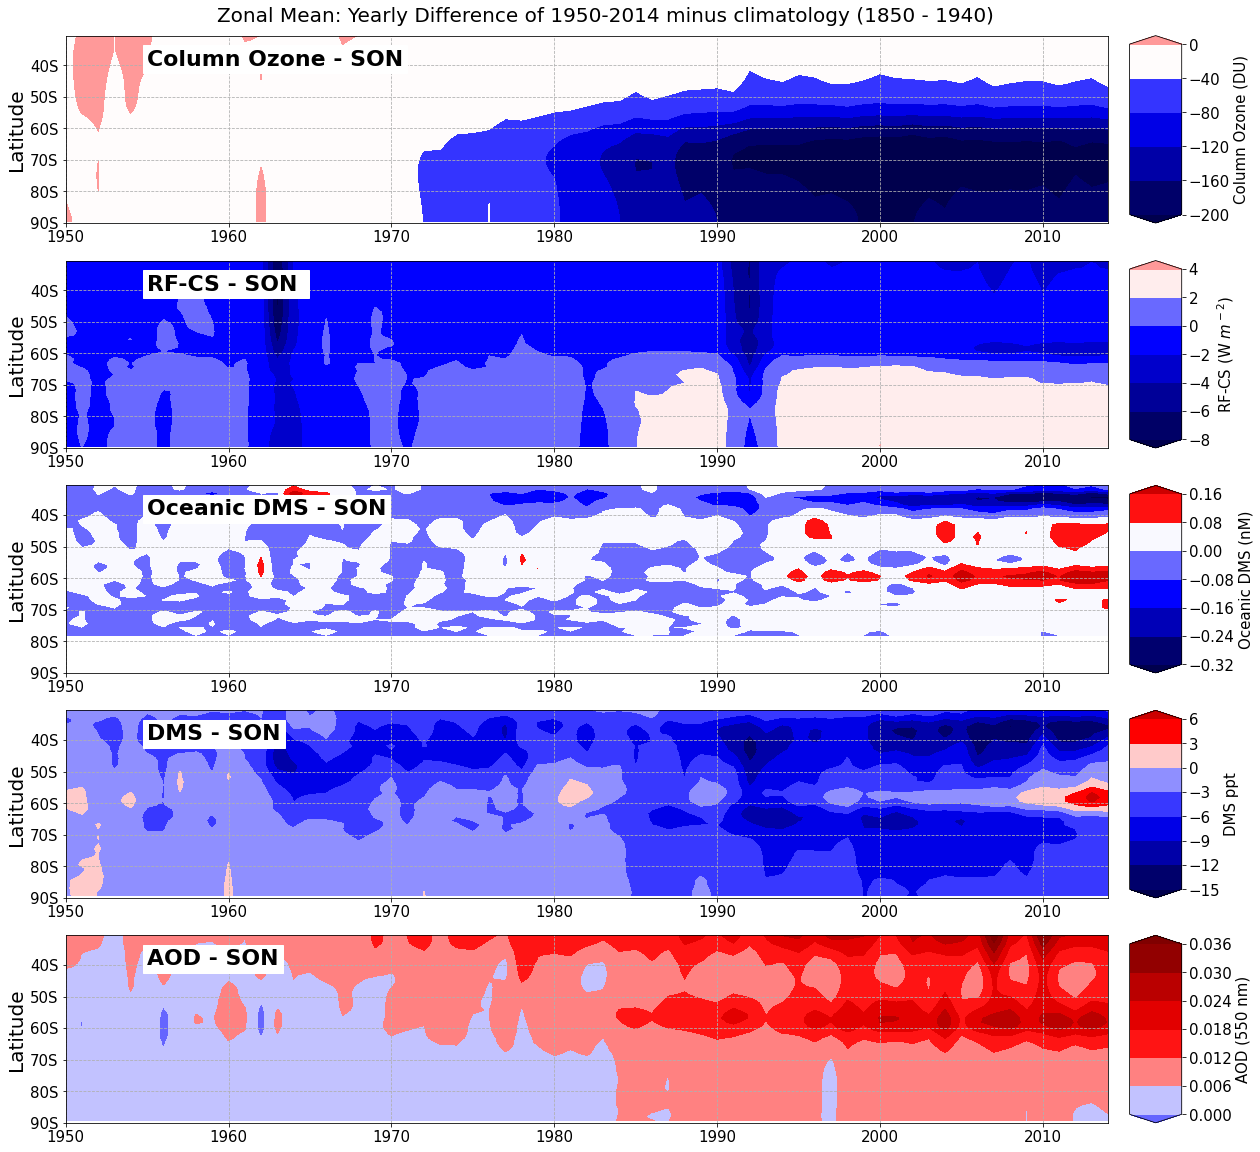

In [195]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020

@author: ybh10
"""
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

##ideas: Try and get two variables on one plot.
## 1) get the climatological mean, and do zonal difference from the mean/STD across time 
## 2) Grab the % difference from 1 for 2 variables, then minus/do something with the difference to see how they relate?

### For Useful shortcuts ###
###   [DJF_global_var[w],MAM_global_var[w],JJA_global_var[w],SON_global_var[w]]

## Ozone_zonal=np.nanmean(SON_global_var[oz][:,100:165,0:48,:],axis=(0,3))
## Wind_zonal=np.nanmean(DJF_global_var[w][:,100:165,0:48,:],axis=(0,3))
## DMS_zonal=np.nanmean(DJF_global_var[dm][:,100:165,0:48,:],axis=(0,3))*DMS_ppt
# #AOD_zonal=np.nanmean(DJF_global_var[ad][:,100:165,0:48,:],axis=(0,3))
## RF_zonal=np.nanmean(DJF_global_var[r][:,100:165,0:48,:],axis=(0,3))
##variable=[Ozone_zonal,Wind_zonal,DMS_zonal,AOD_zonal]#,RF_zonal]


# FOR Oceanic DMS 
hi=np.empty((1, 13, 165, 360)); hi[:]=np.nan
ODMS=[SON_global_var[od]]
ODMS=np.array(ODMS)*ODMS_ppm
ODMS_so=[hi,hi,hi,hi,ODMS[:,:,:,0],ODMS[:,:,:,9],ODMS[:,:,:,19],ODMS[:,:,:,26],ODMS[:,:,:,34],ODMS[:,:,:,40],ODMS[:,:,:,46],
         ODMS[:,:,:,51],ODMS[:,:,:,56],ODMS[:,:,:,61],ODMS[:,:,:,65],ODMS[:,:,:,69],ODMS[:,:,:,72],ODMS[:,:,:,76],
         ODMS[:,:,:,79],ODMS[:,:,:,82],ODMS[:,:,:,85],ODMS[:,:,:,88],ODMS[:,:,:,91],ODMS[:,:,:,93],ODMS[:,:,:,96],
         ODMS[:,:,:,98],ODMS[:,:,:,101],ODMS[:,:,:,103],ODMS[:,:,:,105],ODMS[:,:,:,107],ODMS[:,:,:,109],ODMS[:,:,:,111],
         ODMS[:,:,:,113],ODMS[:,:,:,115],ODMS[:,:,:,117],ODMS[:,:,:,119],ODMS[:,:,:,120],ODMS[:,:,:,122],ODMS[:,:,:,124],
         ODMS[:,:,:,126],ODMS[:,:,:,127],ODMS[:,:,:,128],ODMS[:,:,:,130],ODMS[:,:,:,132],ODMS[:,:,:,133],ODMS[:,:,:,135],
        ODMS[:,:,:,137],ODMS[:,:,:,138]]

ODMS_so=np.array(ODMS_so)
odms=ODMS_so.transpose(1,2,3,0,4)

ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8
numbers=[oz,sdsw,ad,dm,ad]#,r] # ad chosen for ODMS due to the array having a 'one' at the start - easy to put in loop
large_data=[SON_global_var,SON_global_var,odms,SON_global_var,SON_global_var]

maybe=[]
#for e in range(0,13):
for num,datas in zip(numbers,large_data):
    old_vari=np.nanmean(datas[num][:,0:91,0:48,:],axis=(0,1,3))
    vari=np.empty((13, 65, 48)); vari[:]=np.nan
    data=np.nanmean(datas[num],axis=(3))
    for t in range(0,datas[num].shape[0]):
        for i in range(0,vari[num].shape[0]):
            for l in range(0,48):
            #for x in range(0,datas[num].shape[3]):
                  #  print('hi')
                if num == dm !=-1:
                    vari[t,i,l]=(data[t,i+100,l]-old_vari[l])*DMS_ppt
                else:
                    vari[t,i,l]=(data[t,i+100,l]-old_vari[l])
    print(np.shape(vari))
    print(np.nanmean(vari))
    see=np.nanmean(vari,axis=(0))
    maybe.append(see)
maybe=np.array(maybe)
maybe=maybe.transpose(0,2,1)

##units=['Column Ozone (DU)','Westerly Wind (m $s^-$$^1$)','DMS ppt']#, 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']

texts=['Column Ozone - SON','RF-CS - SON ','Oceanic DMS - SON','DMS - SON','AOD - SON']#,'RF - DJF']
units=['Column Ozone (DU)','RF-CS (W $m^-$$^2$)','Oceanic DMS (nM)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']

fig = plt.figure(figsize=(20,20), edgecolor='w')
n=5
ax1 = fig.add_subplot(n,1,1); ax2 = fig.add_subplot(n,1,2); ax3 = fig.add_subplot(n,1,3);ax4 = fig.add_subplot(n,1,4);ax5 = fig.add_subplot(n,1,5)
axes=[ax1,ax2,ax3,ax4,ax5]
#plt.subplots_adjust(hspace=0.05, wspace=0.15)
clevs=np.arange(-240,40,20) # Ozone
#clevs4=np.arange(0,9.5,.5)# RF
clevs1=np.arange(-24,4,2)# RF
clevs2=np.arange(-0.32,0.16,0.04) # ODMS
clevs3=np.arange(-15,6,1.5) # DMS
clevs4=np.arange(-0.005,0.035,0.0025) # AOD

clevy=[clevs,clevs1,clevs2,clevs3,clevs4]
orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.85, name='shifted')
#shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=1, name='shifted')

shift_map=[shifted_cmap_modis,shifted_cmap_modis,shifted_cmap_odms,shifted_cmap_odms,shifted_cmap_aod]
for clev_test, axe,text,unit,variable_check,color in zip(clevy,axes,texts,units,maybe,shift_map):

    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
    axe.grid(linestyle='--',alpha=1)
    axe.set_ylabel('Latitude',fontsize=20)
    y_labels = ['90S','80S','70S','60S','50S','40S']
    y=np.arange(-90,-30,10)
    x=np.arange(1950,2015,10)    
    cs = axe.contourf(Dates,lat_sh,variable_check,cmap=color,extend='both')
    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    t=axe.text(1955,-40,text,color='black',fontsize=22,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    cbar.ax.set_ylabel(unit,fontsize=15)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('Zonal Mean: Yearly Difference of 1950-2014 minus climatology (1850 - 1940)',y=0.9,fontsize=20)

# plt.show()
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/Zonal/Zonal_Difference_ODMS_5_Variables_SON.png",dpi=600,bbox_inches = 'tight')


In [ ]:
fig, host = plt.subplots(figsize=(15,10))
x=np.arange(1850,2015,1)
par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.2))
par2.spines["right"].set_visible(True)

p1,=host.plot(x,DMS_mean,'b-', label = "DMS ")
p2,=par1.plot(x,SO2_mean,'r-',label = "SO2")
p3,=par2.plot(x,O3_Column_mean,'y-',label = "O3")




host.set_xlabel("Year",fontsize=15)
host.set_ylabel("Atmospheric DMS ppt",fontsize=15)
par1.set_ylabel("SO2 Volume Mixing Ratio",fontsize=15)
par2.set_ylabel("Column Ozone (ppm)",fontsize=15)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=5, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)

host.tick_params(axis='x', **tkw,labelsize=15)
lines = [p1, p2,p3]
plt.text(1850,1850,'DMS-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((DMS_mean,SO2_mean))[0,1],3))),color='black',fontsize=20,fontweight='bold')
plt.text(1850,1820,'DMS-O{} $r^2$ = {}'.format('\u2083',str(round(np.corrcoef((DMS_mean,O3_Column_mean))[0,1],3))),color='black',fontsize=20,fontweight='bold')

host.legend(lines, [l.get_label() for l in lines],fontsize=20,loc='center left')
plt.title("UKESM1 [September, October, November] DMS and SO2 (GLOBALLY)",fontsize=20)

plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/UKESM1_Global_SON_DMS_SO2_Ozone_Column.png",dpi=600,bbox_inches = 'tight')

In [ ]:
zeros=np.zeros((180,360))
#rmse=[rms_lana,rms_medusa,0]
rmse=[0,0,0]

title=['1900 - 1902','1994-1996','Post Ind minus Pre Ind']

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
            
fig = plt.figure(figsize=(10,10), edgecolor='w')
fig.subplots_adjust(hspace=0.35, wspace=0.2)
pre_DMS=np.mean(DMS_Global[50:52],axis=0)
post_DMS=np.mean(DMS_Global[145:147],axis=0)
diff_DMS=post_DMS-pre_DMS
GL_DMS=[pre_DMS,post_DMS,diff_DMS]
rela_diff=((pre_DMS/post_DMS)-1)*100

pre_SHDMS=np.mean(DMS_SH_mean[50:52],axis=0)
post_SHDMS=np.mean(DMS_SH_mean[145:147],axis=0);
diff_SHDMS=post_SHDMS-pre_SHDMS
rela_diffSH=((pre_SHDMS/post_SHDMS)-1)*100

mean=[(np.mean(pre_SHDMS)),(np.mean(post_SHDMS)),(np.mean(diff_SHDMS)),rela_diffSH]


ax = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,1,2)
#ax2 = fig.add_subplot(2,2,(3,4))
# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
axes=[ax,ax1,ax2]
for ax,mapy,rmsey,titl,meany in  zip(axes,GL_DMS,rmse,title,mean):
    ax1.grid(linestyle='--',alpha=0.5)
    lons,lats=np.meshgrid(lon,lat)
    #map_ax1 = Basemap(llcrnrlon=0.,llcrnrlat=-85,urcrnrlon=360.,urcrnrlat=85,
     #               projection='cyl',resolution ='c',ax=ax)
    map_ax1 = Basemap(projection='spstere',boundinglat=-10, lon_0=180+(-100+-30)/2,
                    resolution ='c',ax=ax)
    x, y = map_ax1(lons, lats) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    clevs=np.arange(0.0,200+5,5)
  #  DD[DD>0.40]=0.40
    clevs1=np.arange(-30,30+0.5,0.5)

    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl.find (title[0]) !=-1: 
        cs=ax.contourf(x,y,mapy,clevs,cmap='viridis',extend='both')
        ax.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
    if titl.find (title[1]) !=-1: 
        ax1.contourf(x,y,mapy,clevs,cmap='viridis',extend='both')
        ax1.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
    if titl.find (title[2]) !=-1: 
       # mapy[mapy<-30]=-30
        cs1=ax2.contourf(x,y,mapy,clevs1,cmap='seismic',extend='both')
        ax2.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
        cbar=fig.colorbar(cs1,ticks = np.arange(-30,30+5,5))
        cbar.set_label('DMS ppt',fontsize=10)
        cbar.ax.tick_params(labelsize=10)

#plt.tick_params(labelsize=20)
# cax = fig.add_axes([0.92, 0.55, 0.026, 0.26]) # Left, Bottom, Width, Height
# cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,200+5,20))
#         # ax1.set_yticklabels(y_labels)
# cbar.set_label('DMS ppt',fontsize=20)
# cbar.ax.tick_params(labelsize=15)


cax = fig.add_axes([0.11, 0.53, 0.8, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(0,200+5,20))
cbar.ax.tick_params(labelsize=13); cbar.set_label('DMS ppt',fontsize=10)
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
fig.suptitle('Atmospheric DMS change in September, October, November',y=.94,fontsize=12,fontweight='bold')

#cbar.set_ticklabels(np.arange(0,60,4))
plt.show()
#plt.savefig("Plots/DMS_Change_Map_SON.png",dpi=600,bbox_inches = 'tight')


In [ ]:

def plot(global_variable,SH_mean,ppt,latsy,lonsy,clevs,clevs1,shifted_cmap_modis,label,super_title):
    rmse=[0,0,0]
    title=['1900 - 1902','1994-1996','Post Ind minus Pre Ind']    #(rows, columns, position) #
                #    1  2  3  4
                #    5  6  7  8
                #    9 10 11 12            
    fig = plt.figure(figsize=(10,10), edgecolor='w')
    fig.subplots_adjust(hspace=0.35, wspace=0.2)
    pre_DMS=np.nanmean(global_variable[50:52],axis=0)*ppt
    post_DMS=np.nanmean(global_variable[145:147],axis=0)*ppt
    
#     pre_DMS=np.nanmean(global_variable[50:70],axis=0)*ppt
#     post_DMS=np.nanmean(global_variable[140:164],axis=0)*ppt
    diff_DMS=post_DMS-pre_DMS
    GL_DMS=[pre_DMS,post_DMS,diff_DMS]
    rela_diff=((pre_DMS/post_DMS)-1)*100

    pre_SHDMS=np.nanmean(SH_mean[50:52],axis=0)*ppt
    post_SHDMS=np.nanmean(SH_mean[145:147],axis=0)*ppt;
    diff_SHDMS=post_SHDMS-pre_SHDMS
    rela_diffSH=((pre_SHDMS/post_SHDMS)-1)*100

    mean=[(np.nanmean(pre_SHDMS)),(np.nanmean(post_SHDMS)),(np.nanmean(diff_SHDMS)),rela_diffSH]


    ax = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    ax2 = fig.add_subplot(2,1,2)
    #ax2 = fig.add_subplot(2,2,(3,4))
    # cbar_max = 200.0
    # cbar_min = 0.0
    # cbar_step = 5.0
    axes=[ax,ax1,ax2]
    for ax,mapy,rmsey,titl,meany in  zip(axes,GL_DMS,rmse,title,mean):
        ax1.grid(linestyle='--',alpha=0.5)
        lons,lats=np.meshgrid(lonsy,latsy)
        #map_ax1 = Basemap(llcrnrlon=0.,llcrnrlat=-85,urcrnrlon=360.,urcrnrlat=85,
         #               projection='cyl',resolution ='c',ax=ax)
        map_ax1 = Basemap(projection='spstere',boundinglat=-20, lon_0=180+(-100+-30)/2,
                        resolution ='c',ax=ax)
        x, y = map_ax1(lons, lats) 
        lonpt, latpt = map_ax1(x,y,inverse=True)
        meridians = np.arange(0.,360,60.)    
        parallels = np.arange(-90.,90,30.)
        map_ax1.drawcoastlines()
        map_ax1.drawcountries()
        map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)  
        map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)


        #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
        if titl.find (title[0]) !=-1: 
            cs=ax.contourf(x,y,mapy,clevs,cmap='viridis',extend='both')
            ax.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
        if titl.find (title[1]) !=-1: 
            ax1.contourf(x,y,mapy,clevs,cmap='viridis',extend='both')
            ax1.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
        if titl.find (title[2]) !=-1: 
           # mapy[mapy<-30]=-30
            cs1=ax2.contourf(x,y,mapy,clevs1,cmap=shifted_cmap_modis,extend='both')
            ax2.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
            cbar=fig.colorbar(cs1)
            cbar.set_label(label,fontsize=10)
            cbar.ax.tick_params(labelsize=10)

    #plt.tick_params(labelsize=20)
    # cax = fig.add_axes([0.92, 0.55, 0.026, 0.26]) # Left, Bottom, Width, Height
    # cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,200+5,20))
    #         # ax1.set_yticklabels(y_labels)
    # cbar.set_label('DMS ppt',fontsize=20)
    # cbar.ax.tick_params(labelsize=15)


    cax = fig.add_axes([0.11, 0.53, 0.8, 0.025])
    cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal')#,ticks = np.arange(0,200+5,20))
    cbar.ax.tick_params(labelsize=13); cbar.set_label(label,fontsize=10)
    #cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
    fig.suptitle(super_title,y=.94,fontsize=12,fontweight='bold')
    #cbar.set_ticklabels(np.arange(0,60,4))



In [ ]:
clevs=np.arange(1700,2200+100,100)
      #  DD[DD>0.40]=0.40
clevs1=np.arange(-1200,0+100,100)
orig_cmap = matplotlib.cm.seismic

shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0, stop=.5, name='shifted')
super_title='Column Ozone change in September, October, November'
label='Column Ozone (ppm)'
a=plot(Ozone_column_Global,Ozone_column,O3_ppm,lat,lon,clevs,clevs1,shifted_cmap_modis,label,super_title)
#plt.show()
#plt.savefig("Plots/Column_Ozone_Change_Map_SON.png",dpi=600,bbox_inches = 'tight')

In [ ]:
clevs=np.arange(0,100+5,10)
      #  DD[DD>0.40]=0.40
clevs1=np.arange(-8,8+.5,.5)
orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=.5, stop=1, name='shifted')
super_title='SO{} change in September, October, November'.format('\u2082')
label='SO{} (ppt)'.format('\u2082')
a=plot(SO2_Global,SO2,SO2_ppt,lat,lon,clevs,clevs1,shifted_cmap_modis,label,super_title)
plt.savefig("Plots/SO2_Change_Map_SON.png",dpi=600,bbox_inches = 'tight')

In [ ]:
# clevs=np.arange(0,1000,10)
#       #  DD[DD>0.40]=0.40
# clevs1=np.arange(-100,100,2)
# orig_cmap = matplotlib.cm.seismic
# shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=.5, stop=1, name='shifted')
# super_title='Seawater DMS change in September, October, November'
# label='Seawater DMS (ppt)'
# ocean=check_lat_lon(olat,olon,Ocean_DMS_Global)
# laty=ocean[0]
# lony=ocean[1]
# ocean_dms=ocean[2]
# # Initiate new Figure
# pre_DMS=np.mean(ocean_dms[0:50],axis=0)*ODMS_ppm
# post_DMS=np.mean(ocean_dms[130:164],axis=0)*ODMS_ppm
# diff_DMS=post_DMS-pre_DMS
# GL_DMS=[pre_DMS,post_DMS,diff_DMS]
# rela_diff=((pre_DMS/post_DMS)-1)*100

# fig =plt.figure(figsize=(10,10))

# map = Basemap(projection='merc',llcrnrlon=180.,llcrnrlat=-89.,urcrnrlon=-179.,urcrnrlat=90,resolution='c') 



# # Set up axes nd select map projection
# clevs=np.arange(-100,100,10)
# ax1 = fig.add_subplot(1,1,1)
# ax1.set_title('Precipitation Over West Africa over Two Days')
# ax1.set_xlabel('Longitude')

# ax1.set_ylabel('Latitude')
# im1 = ax1.contourf(olon,olat,diff_DMS,clevs,cmap=plt.cm.seismic)


# #cax = fig.add_axes([0.11, 0.53, 0.8, 0.025])
# cbar=fig.colorbar(im1, extend='both',orientation='horizontal',ticks = np.arange(-200,200+5,20))
# cbar.ax.tick_params(labelsize=13); cbar.set_label('DMS ppt',fontsize=10)
# # # Add features

# plt.show()
# #a=plot(Ocean_DMS_Global,SO2,ODMS_ppm,olon,olat,clevs,clevs1,shifted_cmap_modis,label,super_title)
# #plt.savefig("Plots/SO2_Change_Map.png",dpi=600,bbox_inches = 'tight')

In [ ]:
zeros=np.zeros((180,360))
#rmse=[rms_lana,rms_medusa,0]
rmse=[0,0,0]

title=['1850 - 1899','1980-2014','Difference']

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.16, wspace=0.09)
pre_ind_SO2=SO2_Global[0:50]; pre_SO2=np.mean(pre_ind_SO2,axis=0)
ind_SO2=SO2_Global[130:164]; post_SO2=np.mean(ind_SO2,axis=0)
diff_SO2=post_SO2-pre_SO2
GL_SO2=[pre_SO2,post_SO2,diff_SO2]
mean=[(np.mean(pre_ind_SO2)),(np.mean(ind_SO2)),(np.mean(diff_SO2))]
ax = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,(3,4))
# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
axes=[ax,ax1,ax2]
for ax,mapy,rmsey,titl,meany in  zip(axes,GL_SO2,rmse,title,mean):
    ax1.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(llcrnrlon=0.,llcrnrlat=-85,urcrnrlon=360.,urcrnrlat=85,
                    projection='cyl',resolution ='c',ax=ax)
    x, y = map_ax1(lon, lat) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    clevs=np.arange(0.0,200+5,5)
  #  DD[DD>0.40]=0.40
    clevs1=np.arange(-30,30+0.5,0.5)

    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl.find (title[0]) !=-1: 
        cs=ax.contourf(lon,lat,mapy,clevs,cmap='viridis')
        ax.set_title("Averaged {}  [mean = {:.2f}]".format(titl,meany),fontsize=20)
    if titl.find (title[1]) !=-1: 
        ax1.contourf(lon,lat,mapy,clevs,cmap='viridis')
        ax1.set_title("Averaged {}  [mean = {:.2f}]".format(titl,meany),fontsize=20)
    if titl.find (title[2]) !=-1: 
        cs1=ax2.contourf(lon,lat,mapy,clevs1,cmap='seismic')
        ax2.set_title("Averaged {}  [mean = {:.2f}]".format(titl,meany),fontsize=20)
        cbar=fig.colorbar(cs1,ticks = np.arange(-30,30+5,5))
        cbar.set_label('DMS ppt',fontsize=20)
        cbar.ax.tick_params(labelsize=15)

#plt.tick_params(labelsize=20)
# cax = fig.add_axes([0.92, 0.55, 0.026, 0.26]) # Left, Bottom, Width, Height
# cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,200+5,20))
#         # ax1.set_yticklabels(y_labels)
# cbar.set_label('DMS ppt',fontsize=20)
# cbar.ax.tick_params(labelsize=15)


cax = fig.add_axes([0.11, 0.53, 0.8, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(0,200+5,20))
cbar.ax.tick_params(labelsize=13); cbar.set_label('SO2',fontsize=15)
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
fig.suptitle(' SO2 change in September, October, November',y=.87,fontsize=20,fontweight='bold')

#cbar.set_ticklabels(np.arange(0,60,4))
plt.show()
#plt.savefig("SO2_Change_Map_SON",dpi=600,bbox_inches = 'tight')